<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/TFM__TABULAR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def mute_print(*args, **kwargs):
    pass
normal_print = print

# DATOS

In [2]:
import pandas as pd
import pyarrow.parquet as pq

In [3]:
# Ruta del archivo descargado
ruta_archivo = "categorical_dataset"

# Leer el archivo Parquet en un dataframe de pandas
table = pq.read_table(ruta_archivo)
df = table.to_pandas()

NUESTRA ETIQUETA A PREDECIR ES SI EL ACTIVO SE ENCUENTRA O NO EN EL TOP 10 (
EN FUNCION DE SU RATIO DE SHARPE) DE ACTIVOS DEL INDICE.

NUESTRO OBJETIVO NO ES PUNTUAR A LOS ACTIVOS DADO QUE LUEGO REALIZAREMOS LA ASIGNACIÓN DE PESOS A TRAVÉS DE MARKOWITZ.

NUESTRO OBJETIVO ES SELECCIONAR ACTIVOS DEL TOTAL DE ACTIVOS QUE SE ENCUENTRAN EN EL INDICE.


Una vez entrenada la red, seleccionaremos los 10 activos que tengan mas probabilidad de estar entre los 10 primeros.

In [4]:
df

,ticker,date,period_mean_return,period_std_return,period_min_return,period_max_return,sharpe_ratio,sortino_ratio,beta,treynor_ratio,benchmark_distance,informatio_ratio,modigliani_measure,alfa_jensen,label
0,A3TV,2005-08-19,-0.002801,0.011520,-0.030143,0.016199,-3.273502,-0.957734,0.531862,-0.005267,0.011935,-0.343632,0.019577,-0.055674,1
1,A3TV,2005-08-22,-0.002361,0.011360,-0.030143,0.016199,-3.294102,-0.958229,0.718641,-0.003285,0.011286,-0.305949,0.020188,-0.061903,1
2,A3TV,2005-08-23,-0.002069,0.011383,-0.030143,0.016199,-3.250204,-0.957165,0.582280,-0.003553,0.011391,-0.252988,0.019526,-0.056889,1
3,A3TV,2005-08-24,-0.002149,0.011419,-0.030143,0.016199,-3.241922,-0.956960,0.669675,-0.003209,0.011217,-0.236099,0.019801,-0.060056,1
4,A3TV,2005-08-25,-0.003519,0.011605,-0.030143,0.014156,-3.325083,-0.958956,0.821449,-0.004284,0.011298,-0.328375,0.018543,-0.067348,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209358,ZEL,2004-12-23,-0.002402,0.008431,-0.016590,0.021979,-2.871874,-0.946093,0.445910,-0.005386,0.009521,-0.499642,0.005598,-0.033085,0
209359,ZEL,2004-12-27,-0.002484,0.008491,-0.016590,0.021979,-2.940236,-0.948382,0.448289,-0.005541,0.009632,-0.514711,0.006015,-0.034153,0
209360,ZEL,2004-12-28,-0.002563,0.008529,-0.016590,0.021979,-2.893856,-0.946844,0.448801,-0.005711,0.009690,-0.519082,0.005930,-0.033730,0
209361,ZEL,2004-12-29,-0.002522,0.008500,-0.016590,0.021979,-2.881434,-0.946421,0.427910,-0.005893,0.009764,-0.525455,0.005927,-0.033003,0


In [5]:
df_ordenado = df.sort_values(by='date')
df_ordenado

,ticker,date,period_mean_return,period_std_return,period_min_return,period_max_return,sharpe_ratio,sortino_ratio,beta,treynor_ratio,benchmark_distance,informatio_ratio,modigliani_measure,alfa_jensen,label
22640,ALB_2,1993-09-27,-0.001971,0.018035,-0.061189,0.033582,-1.746168,-0.871552,0.986684,-0.001998,0.013912,-0.166872,0.009292,-0.060266,1
174049,SAN,1993-09-27,0.000388,0.011511,-0.034368,0.023298,-2.530754,-0.932128,0.693401,0.000560,0.008827,0.003517,0.000203,-0.049354,1
13176,ACX_1,1993-09-27,-0.001724,0.011944,-0.029422,0.025102,-2.615899,-0.936067,0.525264,-0.003281,0.011648,-0.178471,-0.000783,-0.046562,1
37140,BBVA,1993-09-27,0.001684,0.010576,-0.017796,0.023463,-2.632097,-0.936778,0.806238,0.002088,0.005516,0.243676,-0.000971,-0.051349,0
102541,IBE,1993-09-27,0.001913,0.012509,-0.019467,0.036917,-2.206903,-0.914364,0.728892,0.002625,0.009711,0.159683,0.003955,-0.048863,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92921,FER,2023-08-10,0.001721,0.007593,-0.016283,0.014882,-6.932801,-0.990093,0.503308,0.003420,0.007636,0.231607,-0.006009,-0.080013,0
174048,SAB,2023-08-10,0.001373,0.014742,-0.023552,0.030700,-3.594265,-0.964563,0.967670,0.001419,0.011979,0.115947,0.023062,-0.105618,0
99407,GRF,2023-08-10,0.004662,0.017053,-0.028127,0.040668,-2.914289,-0.947530,0.659628,0.007067,0.016725,0.287316,0.028983,-0.085575,1
102540,IAG,2023-08-10,0.001017,0.019294,-0.042307,0.059551,-2.764728,-0.942328,0.655603,0.001552,0.018388,0.056065,0.030286,-0.089000,1


In [6]:
df_ordenado.date.values[0], df_ordenado.date.values[-1]

(numpy.datetime64('1993-09-27T00:00:00.000000000'),
 numpy.datetime64('2023-08-10T00:00:00.000000000'))

## Separamos train de test por fechas

In [7]:
df_train = df[df['date'] <= '2021-01-01']
df_train.shape

(186365, 15)

In [8]:
df_test = df[df['date'] > '2021-01-01']
df_test.shape

(22998, 15)

In [9]:
df_y_train = df_train.iloc[:,-1]
df_x_train = df_train.iloc[:,2:-1]

df_y_test = df_test.iloc[:,-1]
df_x_test = df_test.iloc[:,2:-1]

In [10]:
df_y_train.shape, df_x_train.shape, df_y_test.shape, df_x_test.shape

((186365,), (186365, 12), (22998,), (22998, 12))

## Escalado de datos

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train= scaler.fit_transform(df_x_train)

In [13]:
X_test = scaler.transform(df_x_test)

## y

In [14]:
import numpy as np

In [15]:
Y_train = np.array(df_y_train)
Y_test = np.array(df_y_test)

In [16]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((186365, 12), (186365,), (22998, 12), (22998,))

# MODELO FIJO ( De referencia )

In [17]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout, Reshape, Conv1D, Masking, LSTM, Conv2D, Input,Multiply, Lambda
from keras.optimizers import Adam
from keras.regularizers import L2, L1L2, L1
from keras.models import Sequential, Model
#import tensorflow_ranking as tfr
from keras.callbacks import EarlyStopping

In [ ]:
input = Input(shape=(X_train.shape[1],))

layer_1 = Dense(10, activation='relu', kernel_regularizer=L2(0.1))(input)
dropout_1 = Dropout(0.5)(layer_1)
layer_2 = Dense(5, activation='relu', kernel_regularizer=L2(0.1))(dropout_1)
dropout_2 = Dropout(0.5)(layer_2)

flatten = Flatten()(dropout_2)

output = Dense(1, activation='sigmoid')(flatten)

model = Model(inputs=input, outputs=output)

model.summary()

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 10)                130       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6     

In [ ]:
earlystopping = EarlyStopping(
    #monitor='val_loss',
    monitor='val_accuracy',
    patience=20,
    #mode='min',
    #mode='max',
    restore_best_weights=True,
    verbose = 1
    )

batch_size = 280
h = model.fit(
    X_train, Y_train,
      epochs=500,
      batch_size = batch_size,
      validation_split = 0.3,
      callbacks = [earlystopping],
      shuffle=True,
      verbose=True
          )

Epoch 1/500
466/466 [==============================] - 5s 4ms/step - loss: 0.6896 - accuracy: 0.6854 - val_loss: 0.5465 - val_accuracy: 0.7765
Epoch 2/500
466/466 [==============================] - 1s 3ms/step - loss: 0.5909 - accuracy: 0.6995 - val_loss: 0.5272 - val_accuracy: 0.8084
Epoch 3/500
466/466 [==============================] - 2s 3ms/step - loss: 0.5807 - accuracy: 0.7027 - val_loss: 0.5021 - val_accuracy: 0.8230
Epoch 4/500
466/466 [==============================] - 1s 3ms/step - loss: 0.5773 - accuracy: 0.7052 - val_loss: 0.4924 - val_accuracy: 0.8357
Epoch 5/500
466/466 [==============================] - 1s 3ms/step - loss: 0.5677 - accuracy: 0.7082 - val_loss: 0.5042 - val_accuracy: 0.8121
Epoch 6/500
466/466 [==============================] - 1s 3ms/step - loss: 0.5656 - accuracy: 0.7092 - val_loss: 0.4741 - val_accuracy: 0.8136
Epoch 7/500
466/466 [==============================] - 1s 3ms/step - loss: 0.5627 - accuracy: 0.7092 - val_loss: 0.4713 - val_accuracy: 0.8125

## history

In [18]:
import matplotlib.pyplot as plt

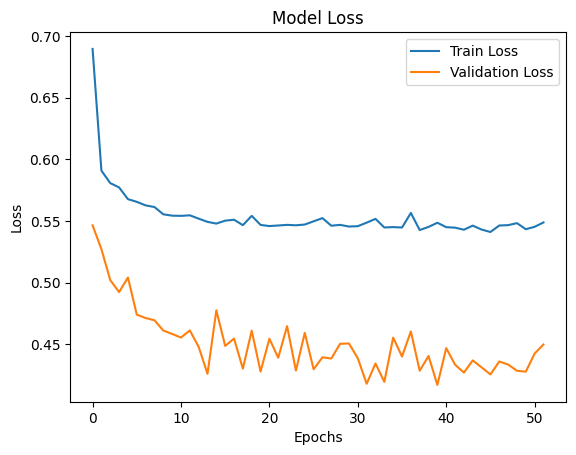

In [ ]:
plt.plot(h.history['loss'],label='Train Loss')
plt.plot(h.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

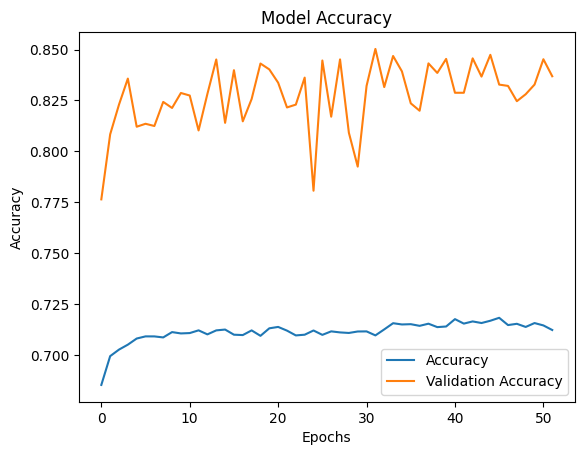

In [ ]:
plt.plot(h.history['accuracy'],label='Accuracy')
plt.plot(h.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

## evaluate test

In [ ]:
model.evaluate(X_test, Y_test)

719/719 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.8196


[0.432483971118927, 0.8195930123329163]

# REGLAS EVOLUTIVO

##  create_model (class)

In [19]:
from keras.layers import Input, Dense, concatenate, Conv1D, Flatten
from keras.models import Model
import numpy as np
import networkx as nx
from keras.utils import plot_model
from keras.optimizers import Adam
from tensorflow.keras.regularizers import L2

Por temas de coste computacional se reduce el numero de neuronas posibles, los resultados aumentandolas son similares, y ademas los modelos tienden a sobre aprender

In [29]:
class create_model():

  def __init__(self):

    self.neurones_range = [1,2,3,4,5]#10]#, 15]
    self.l2_range = [0,0.3,0.6,0.9]
    self.dropout_range = [0,0.3,0.6,0.9]

    self.gen_dic = {
          "neurones_range_0":self.neurones_range,
          "neurones_range_1":self.neurones_range,
          "neurones_range_2":self.neurones_range,
          "neurones_range_3":self.neurones_range,
          "neurones_range_4":self.neurones_range,
          "neurones_range_5":self.neurones_range,

          "l2_range_0":self.l2_range,
          "l2_range_1":self.l2_range,
          "l2_range_2":self.l2_range,
          "l2_range_3":self.l2_range,
          "l2_range_4":self.l2_range,
          "l2_range_5":self.l2_range,

          "dropout_range_0":self.dropout_range,
          "dropout_range_1":self.dropout_range,
          "dropout_range_2":self.dropout_range,
          "dropout_range_3":self.dropout_range,
          "dropout_range_4":self.dropout_range,
          "dropout_range_5":self.dropout_range,

    }
  # METODOS PARA CREAR LOS INDIVIDUOS
  def crear_fila_conexiones(self, n):
    num_ones = np.random.randint(1, n + 1)
    array = np.array([1]*num_ones + [0]*(n-num_ones))
    np.random.shuffle(array)
    return array


  def crear_fila_conexiones_0(self, n):
    num_ones = np.random.randint(0, n+1)
    array = np.array([1]*num_ones + [0]*(n-num_ones))
    np.random.shuffle(array)
    return array

  def crear_individuo(self):

    neurones_range = self.neurones_range
    l2_range = self.l2_range
    dropout_range = self.dropout_range

    ind = np.concatenate((
      self.crear_fila_conexiones(5) ,
      self.crear_fila_conexiones_0(4),
      self.crear_fila_conexiones_0(3),
      self.crear_fila_conexiones_0(2),
      self.crear_fila_conexiones_0(1),

      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),
      np.random.choice(neurones_range, size=1),

      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),
      np.random.choice(l2_range, size=1),

      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),
      np.random.choice(dropout_range, size=1),


    ))

    return ind

  def crear_population(self, n):
    return np.array([self.crear_individuo() for _ in range(n)])

  def crear_matrix(self, individuo_matrix_genes):
    matrix = [
        np.concatenate((  np.array([0]) ,         individuo_matrix_genes[0:5] )),
        np.concatenate((  np.array([0,0]) ,       individuo_matrix_genes[5:9]  )),
        np.concatenate((  np.array([0,0,0]) ,     individuo_matrix_genes[9:12] )),
        np.concatenate((  np.array([0,0,0,0]) ,   individuo_matrix_genes[12:14]  )),
        np.concatenate((  np.array([0,0,0,0,0]) , individuo_matrix_genes[14:15]  )),
        np.array([0,0,0,0,0,0]),
    ]
    return matrix


  # METODOS PARA CREAR MODELO

  def output_layer(self, node_outputs, output_shape, activation='sigmoid' ):

    m = Flatten()(list(node_outputs.values())[-1])
    # Crear ultima capa densa para el modelo
    node_output = Dense(1, activation=activation, name="OUTPUT"  )(m)
    # Almacenar la salida


    return node_output

  def normal_layer(self, node, node_input, n_neurons, l2, do):
    m = Dense(n_neurons, activation='relu', kernel_regularizer=L2(l2), name="Densa_" + str(node) )(node_input)
    m = Dropout(do)(m)
    return m

  def create_model_from_graph(self, matrix, gen_neurons_array, gen_l2_array, gen_dropout_array ,input_shape, output_shape):

    graph = nx.from_numpy_array(np.array(matrix), create_using=nx.DiGraph)

    # Crear una capa de entrada para el modelo
    input_layer = Input(shape=input_shape, name="INPUT")

    # Crear un diccionario para almacenar las salidas de las capas para cada nodo
    node_outputs = {}
    disconnected_nodes = set()  # para almacenar nodos desconectados

    # CONFIGURACION RED INTERNA
    #print("----- NUEVA RED -----")
    # Procesar los nodos en orden topológico
    for node in nx.topological_sort(graph):
        node_input = None

        #print("current_nodo:" ,node )
        #print("graph.in_degree(node)", graph.in_degree(node))
        #print("predecessors:",len([predecessor for predecessor in graph.predecessors(node)]) )



        #if (graph.in_degree(node) == 0) and (node == 0) :
        if (graph.in_degree(node) == 0) and (len(node_outputs) == 0) :
            # El primer nodo tiene el input como entrada , OBLIGATORIO, es el priemro de todos y nunca tiene "padre"
            node_input = input_layer
        elif (graph.in_degree(node) == 0) and (node != 0 ):
            # Si el nodo no tiene predecesores, su entrada es la capa de entrada del modelo
            disconnected_nodes.add(node)
            #print("nodo desconectado")
            continue

        else:
            len_aux =  len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            # Todos sus predecesores estan desconectados
            if(len_aux == 0):
              disconnected_nodes.add(node)
              #print("nodo desconectado2")
              continue
            #print("len clean ", len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes]) == 0)
            # Verificar si el nodo actual tiene algún predecesor desconectado
            #if any(predecessor in disconnected_nodes for predecessor in graph.predecessors(node)):
                #disconnected_nodes.add(node)
                #continue
            #print("desconectados:" ,disconnected_nodes )
            #print("predecessors:",[predecessor for predecessor in graph.predecessors(node)] )
            #print("LEN predecessors:",len([predecessor for predecessor in graph.predecessors(node)]))

            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores
            #node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node)])
            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores

            if len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes]) > 1:
              node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            else:
              #print([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
              node_input = [node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes][0]

        # Crear una capa densa para el nodo
        node_output = self.normal_layer(node, node_input, gen_neurons_array[node], gen_l2_array[node], gen_dropout_array[node])        # normal_layer(node, node_input, n_neurons, l2, do):

        # Almacenar la salida de la capa para este nodo
        node_outputs[node] = node_output
        #print("node_outputs ", node_outputs)

    # CONFIGURACION PARA SALIDA

    model_output = self.output_layer(node_outputs, output_shape, activation='sigmoid' )
    # Crear el modelo de Keras
    model = Model(inputs=input_layer, outputs=model_output)


    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    return model


  def create_model(self, indv, X_shape, Y_shape):

    indv_matrix = self.crear_matrix(indv)

    indv_model = self.create_model_from_graph(indv_matrix, indv[15:21], indv[21:27], indv[27:33] , X_shape, Y_shape)

    return indv_model

##  evo_rules (class)

In [20]:
import random
import numpy as np
import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, SpatialDropout1D, BatchNormalization, Concatenate
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping
import time
from keras import backend as K
import tensorflow as tf

In [ ]:
class evo_rules():
  def __init__(self, create_model):
    self.this_ = self
    self.create_model = create_model

  def fitness_function(self,population, X_TRAIN,  Y_TRAIN, epochs, patience = 50,  verbose = 0 ):

    h_layers =      np.empty(population.shape[0])
    h_params =      np.empty(population.shape[0])
    val_loss_win =  np.empty(population.shape[0])
    val_accuracy =  np.empty(population.shape[0])

    for i in range(population.shape[0]):

          model = self.create_model(population[i],  X_TRAIN.shape[1:], 1 )

          # Define el callback EarlyStopping
          early_stopping = EarlyStopping(monitor='val_accuracy', patience = patience, verbose=verbose, restore_best_weights=True)

          history = model.fit(X_TRAIN, Y_TRAIN,
                              epochs=epochs,
                              batch_size=X_TRAIN.shape[0],
                              validation_split= 0.3,
                              shuffle = True,
                              verbose=verbose,
                              callbacks=[early_stopping])


          vlw = ( history.history['val_loss'][-1] < history.history['loss'][-1] )  * 1
          va = max(history.history['val_accuracy'])
          #print("vlw ", vlw)
          #print("va ",va)

          val_loss_win[i] = vlw
          val_accuracy[i] = va

          h_layers[i] = len(model.layers)
          h_params[i] = sum([layer.count_params() for layer in model.layers if layer.trainable])




    return val_loss_win * val_accuracy, h_layers, h_params

  def uniform_crossover(self, parents, chance_flip = 0.5):

        def uniform_crossover(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(parents):
            parents = parents
            np.random.shuffle(parents)
            offspring = []
            for i in range(0, len(parents), 2):

                parent1 = parents[i]
                parent2 = parents[i+1]

                childs = uniform_crossover(parent1, parent2 )

                offspring.append(childs[0])
                offspring.append(childs[1])

            return offspring

        return np.array(easy_crossover(parents))

  def mutation(self, immigration ,offspring, chance_flip = 0.05):

        def uniform_crossover_mut(parent1, parent2):
            child1, child2 = parent1.copy(), parent2.copy()
            for i in range(len(parent1)):
                if np.random.uniform(0, 1) < chance_flip:  # Choose randomly
                    child1[i], child2[i] = child2[i], child1[i]  # Swap elements
            return child1, child2

        def easy_crossover(immigration , current_offspring):

            new_offspring = []
            for i in range(len(immigration)):

                parent1 = immigration[i]
                parent2 = current_offspring[i]

                childs = uniform_crossover_mut(parent1, parent2 )

                #new_offspring.append(childs[0])
                new_offspring.append(childs[1])

            return new_offspring

        return np.array(easy_crossover(immigration , offspring))


  def get_best_population(self, population, fitness, n_save_best_population):
    idx_best_pop = np.argsort(fitness)[::-1][:n_save_best_population]
    return np.array(population)[idx_best_pop]



## ver_evo (class)

In [ ]:
class ver_evo():
  def __init__(self, gen_dic):

    self.gen_dic = gen_dic

    self.historical = self.historical = {key: {} for key in self.gen_dic.keys()}


  def count_occurrences(self, values, population):
      return {value: np.sum(population == value) for value in values}

  def count_gen(self, pop, generation):

    counts = {}
    keys = list(self.gen_dic.keys())

    for i in range(len(self.gen_dic)):
      #print(i)

      #print(self.gen_dic[keys[i]])

      counts[keys[i]] = self.count_occurrences(self.gen_dic[keys[i]], pop[:, i])

    for i in range(len(counts)):

      self.historical[keys[i]][generation] = counts[keys[i]]


  def show_historical(self):

    h =  {key: {} for key in self.gen_dic.keys()}

    fig, axs = plt.subplots(len(self.gen_dic), 1, figsize=(10, 20))
    _keys = list(self.historical.keys())

    for i in range(len(self.historical)):
      #print(i)

      h[_keys[i]] = pd.DataFrame(self.historical[_keys[i]]).T

    for i in range(len(self.historical)):

      for column in h[_keys[i]].columns:

        axs[i].plot(h[_keys[i]][column], label=str(column))

      axs[i].set_title(_keys[i])
      axs[i].set_ylabel('N_MODELS')
      axs[i].set_xlabel('GENERACIONES')
      axs[i].legend()

    plt.tight_layout()
    plt.show()



# EVOLUTIVO

## evo_get_model (def)

In [ ]:
def evo_get_model(
  pop,
  n_generations = 3,
  #n_initial_population = 4,
  n_epochs = 2,
  n_best_pop = 2,
  n_parents = 2,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.35,
  n_immigration_population = 0,
  n_callback_patience = 15
  ):


  cm = create_model()
  evo = evo_rules(cm.create_model)

  # Inicializar el mejor fitness global y el mejor individuo global
  best_global_fitness = float('-inf')  # Se asume que buscas minimizar el fitness
  best_global_individual = None
  h_best_fitness = []

  h_pop =  ver_evo(cm.gen_dic)
  h_parents_pop =  ver_evo(cm.gen_dic)
  h_best_pop =  ver_evo(cm.gen_dic)

  h_layers = {}
  h_params = {}

  #pop = cm.crear_population(n_initial_population)
  new_pop = pop

  for i in range(n_generations):

    # Registra el tiempo inicial
    start_time = time.time()

    # STAR EVO
    pop = new_pop

    fitness,  layers, params = evo.fitness_function(pop,
                        X_train , Y_train,
                        n_epochs,
                        n_callback_patience,
                        verbose = 0 )

    h_layers[i] = layers
    h_params[i] = params

    best_pop = evo.get_best_population(pop, fitness, n_save_best_population = n_best_pop)

    parents = evo.get_best_population(pop, fitness, n_save_best_population = n_parents)

    offspring = evo.uniform_crossover(parents, chance_flip = n_chance_flip_crossover)

    gens_for_mutation = cm.crear_population(len(parents))
    mutated = evo.mutation(gens_for_mutation ,parents, chance_flip = n_chance_flip_mutation)

    immigration = cm.crear_population(n_immigration_population)

    new_pop = np.concatenate((offspring, mutated))
    new_pop = np.concatenate((new_pop, best_pop))
    if len(immigration) > 0: new_pop = np.concatenate((new_pop, immigration))


    # FIN EVO

    # Identificar el mejor fitness de la generación y el correspondiente individuo
    best_value_index = np.argmax(fitness)
    best_value = fitness[best_value_index]
    best_individual = pop[best_value_index]

    # Comparar con el mejor global
    if best_value > best_global_fitness:
        best_global_fitness = best_value
        best_global_individual = best_individual.copy()
        print("BEST")
        print(best_global_fitness)
        print(best_global_individual)


    h_pop.count_gen(              new_pop[:, -18:],  i)
    h_parents_pop.count_gen(      parents[:, -18:],  i)
    h_best_pop.count_gen(         best_pop[:, -18:],  i)



    # Obtener el valor mínimo
    best_value = np.max(fitness)
    h_best_fitness.append(best_value)

    print("GENERACION : " , i + 1)
    print("best_fitness : " , best_value)

    # Registra el tiempo final
    end_time = time.time()
    # Calcula la diferencia
    elapsed_time = end_time - start_time
    print(f"El código tomó {elapsed_time:.2f} segundos para ejecutarse.")

  # Gráfica para  h_best_fitness
  plt.plot(h_best_fitness)
  plt.title("h_best_fitness")
  plt.show()

  return best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop, h_layers, h_params

## Ejecutamos evolucion

### Una primera busqueda

BEST
0.7538365125656128
[0.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  1.  1.  1.  3.  2.  4.
 4.  5.  2.  0.9 0.3 0.9 0.  0.9 0.6 0.3 0.3 0.3 0.  0.9 0.3]
GENERACION :  1
best_fitness :  0.7538365125656128
El código tomó 83.00 segundos para ejecutarse.
GENERACION :  2
best_fitness :  0.7507243752479553
El código tomó 86.07 segundos para ejecutarse.
BEST
0.848774790763855
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  4.
 4.  2.  5.  0.  0.  0.9 0.9 0.  0.3 0.6 0.  0.9 0.3 0.9 0.6]
GENERACION :  3
best_fitness :  0.848774790763855
El código tomó 96.14 segundos para ejecutarse.
BEST
0.8767662048339844
[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.  2.  5.
 2.  1.  4.  0.  0.6 0.3 0.6 0.9 0.  0.  0.  0.9 0.6 0.9 0.3]
GENERACION :  4
best_fitness :  0.8767662048339844
El código tomó 101.59 segundos para ejecutarse.
GENERACION :  5
best_fitness :  0.8708459734916687
El código tomó 98.60 segundos para ejecutarse.
GENERACION :  6
best_fitness :  0.871

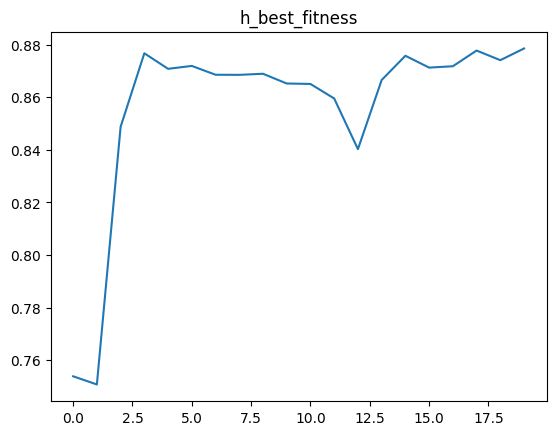

In [ ]:
best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  pop = create_model().crear_population(50),
  n_generations = 20,
  n_epochs = 250,
  n_best_pop = 10,
  n_parents = 10,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.5,
  n_immigration_population = 20,
  n_callback_patience = 10
  )

#### Guardamos pop

In [ ]:
np.save('pop_1.npy', new_pop)
from google.colab import files
files.download('pop_1.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualizamos evolucion de parametros y layers

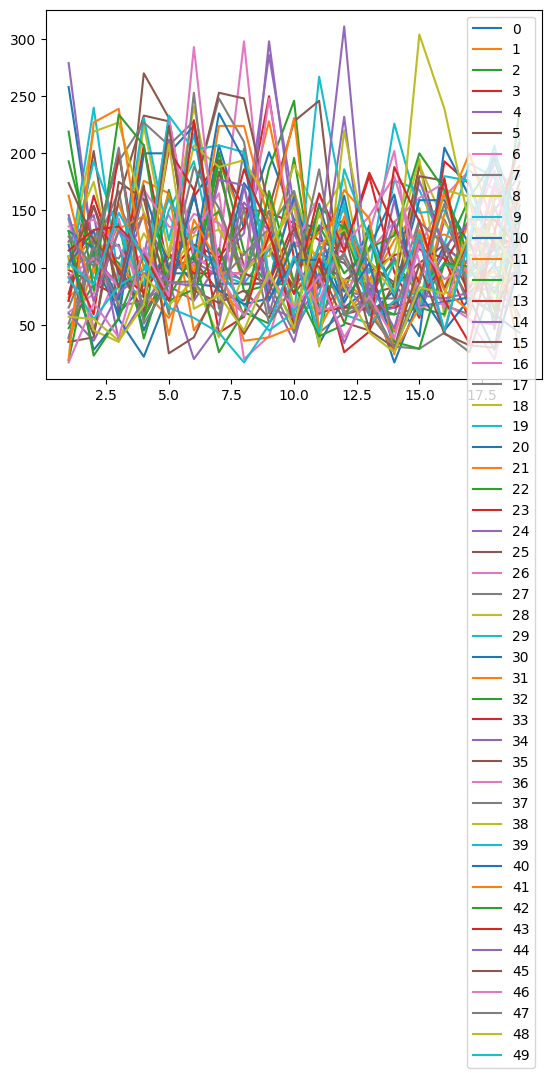

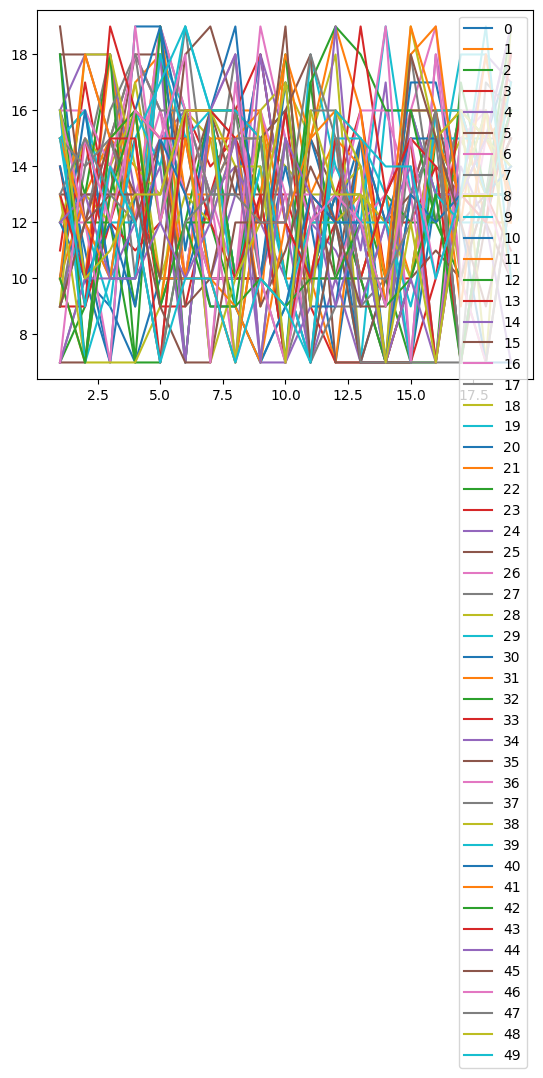

In [ ]:
del h_params[0]
pd.DataFrame(h_params).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_parametros')
plt.title('modelos_g1')
plt.legend().set_visible(False)
del h_layers[0]
pd.DataFrame(h_layers).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_layers')
plt.title('modelos_g1')
plt.legend().set_visible(False)

### Una segunda busqueda

In [ ]:
new_pop = np.load('pop_1.npy')

In [ ]:
len(new_pop)

50

BEST
0.8798604607582092
[1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  5.  2.  2.
 3.  1.  4.  0.  0.3 0.3 0.3 0.9 0.  0.  0.  0.9 0.6 0.6 0.3]
GENERACION :  1
best_fitness :  0.8798604607582092
El código tomó 285.66 segundos para ejecutarse.
BEST
0.8818458318710327
[0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  4.  2.  4.
 4.  1.  4.  0.  0.9 0.3 0.9 0.9 0.  0.  0.6 0.  0.6 0.3 0.3]
GENERACION :  2
best_fitness :  0.8818458318710327
El código tomó 112.27 segundos para ejecutarse.
GENERACION :  3
best_fitness :  0.87869793176651
El código tomó 110.61 segundos para ejecutarse.
GENERACION :  4
best_fitness :  0.8798962831497192
El código tomó 122.86 segundos para ejecutarse.
GENERACION :  5
best_fitness :  0.8750134110450745
El código tomó 103.56 segundos para ejecutarse.
GENERACION :  6
best_fitness :  0.878662109375
El código tomó 127.56 segundos para ejecutarse.
GENERACION :  7
best_fitness :  0.8761581182479858
El código tomó 128.28 segundos para ejecutars

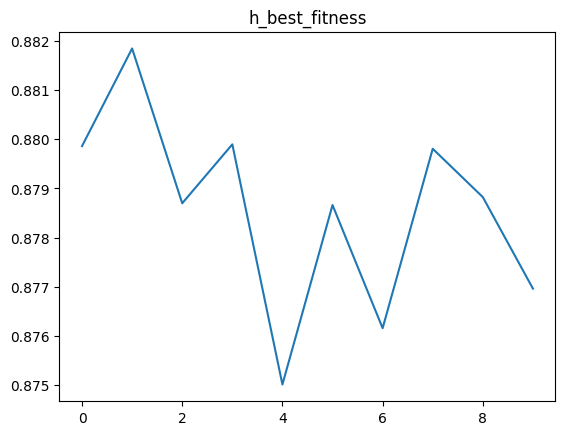

In [ ]:
best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  pop = new_pop,
  n_generations = 10,
  #n_initial_population = 18,
  n_epochs = 500,
  n_best_pop = 3,
  n_parents = 6,
  n_chance_flip_crossover = 0.5,
  n_chance_flip_mutation = 0.25,
  n_immigration_population = 0,
  n_callback_patience = 20
  )

### Guardamos pop

In [ ]:
np.save('pop_2.npy', new_pop)
from google.colab import files
files.download('pop_2.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualizamos evolucion de parametros y layers

Text(0.5, 1.0, 'modelos')

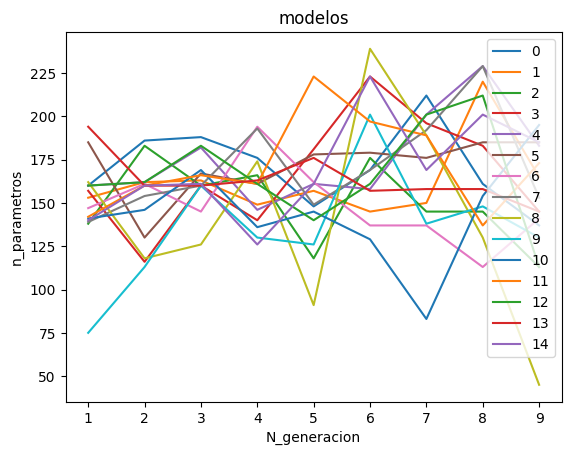

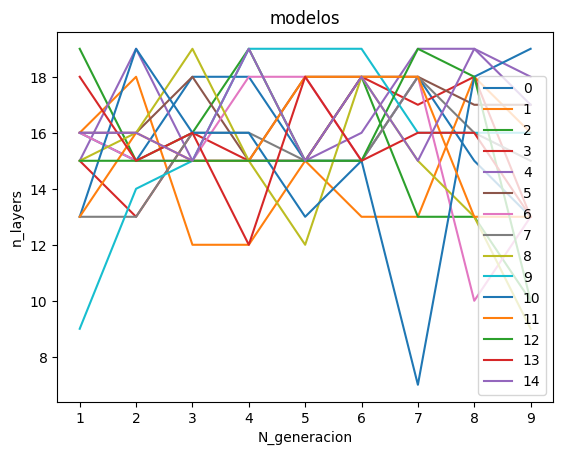

In [ ]:
del h_params[0]
pd.DataFrame(h_params).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_parametros')
plt.title('modelos_g2')
plt.legend().set_visible(False)
del h_layers[0]
pd.DataFrame(h_layers).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_layers')
plt.title('modelos_g2')
plt.legend().set_visible(False)

#### Visualizar genes por generacion

In [ ]:
h_pop.show_historical()

In [ ]:
h_parents_pop.show_historical()

In [ ]:
h_best_pop.show_historical()

### Una tercera busqueda

In [ ]:
new_pop = np.load('pop_2.npy')

In [ ]:
len(new_pop)

15

BEST
0.8805938363075256
[0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  4.  2.  4.
 3.  1.  5.  0.  0.3 0.  0.3 0.9 0.  0.  0.9 0.6 0.6 0.3 0. ]
GENERACION :  1
best_fitness :  0.8805938363075256
El código tomó 198.58 segundos para ejecutarse.
GENERACION :  2
best_fitness :  0.8803613185882568
El código tomó 98.38 segundos para ejecutarse.
GENERACION :  3
best_fitness :  0.8785905838012695
El código tomó 82.03 segundos para ejecutarse.
GENERACION :  4
best_fitness :  0.8796816468238831
El código tomó 64.40 segundos para ejecutarse.
GENERACION :  5
best_fitness :  0.8776426315307617
El código tomó 82.92 segundos para ejecutarse.
GENERACION :  6
best_fitness :  0.8767841458320618
El código tomó 74.14 segundos para ejecutarse.
BEST
0.882149875164032
[0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.  0.  4.  2.  4.
 3.  1.  5.  0.  0.3 0.  0.3 0.9 0.  0.  0.9 0.  0.6 0.3 0. ]
GENERACION :  7
best_fitness :  0.882149875164032
El código tomó 90.11 segundos para ejecutarse.

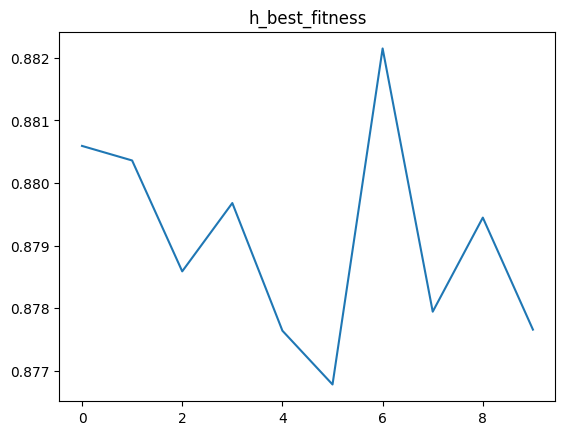

In [ ]:
best_global_individual, best_global_fitness, h_pop, h_parents_pop, h_best_pop, new_pop,  h_layers, h_params = evo_get_model(
  pop = new_pop,
  n_generations = 10,
  #n_initial_population = 18,
  n_epochs = 500,
  n_best_pop = 2,
  n_parents = 2,
  n_chance_flip_crossover = 0.25,
  n_chance_flip_mutation = 0.10,
  n_immigration_population = 0,
  n_callback_patience = 40
  )

### Guardamos pop

In [ ]:
np.save('pop_3.npy', new_pop)
from google.colab import files
files.download('pop_3.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Visualizamos evolucion de parametros y layers

Text(0.5, 1.0, 'modelos_g3')

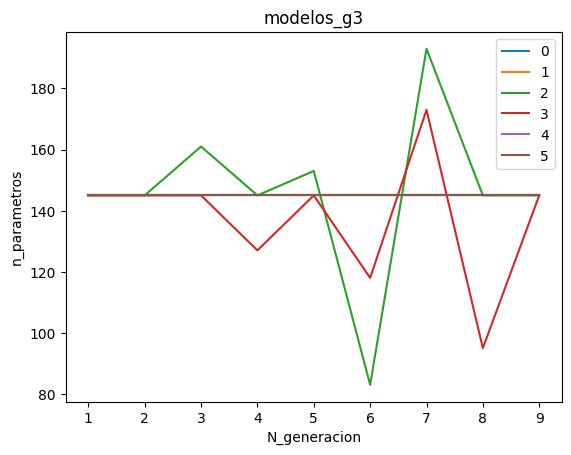

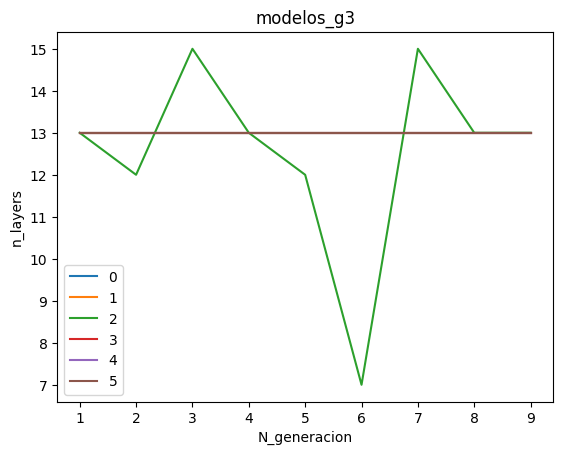

In [ ]:
del h_params[0]
pd.DataFrame(h_params).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_parametros')
plt.title('modelos_g3')
#plt.legend().set_visible(False)
del h_layers[0]
pd.DataFrame(h_layers).T.plot();
plt.xlabel('N_generacion')
plt.ylabel('n_layers')
plt.title('modelos_g3')
#plt.legend().set_visible(False)

In [ ]:
len(new_pop)

6

In [ ]:
best_global_individual, best_global_fitness

(array([0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. ,
        1. , 0. , 4. , 2. , 4. , 3. , 1. , 5. , 0. , 0.3, 0. , 0.3, 0.9,
        0. , 0. , 0.9, 0. , 0.6, 0.3, 0. ]),
 0.882149875164032)

#### Visualizar genes por generacion

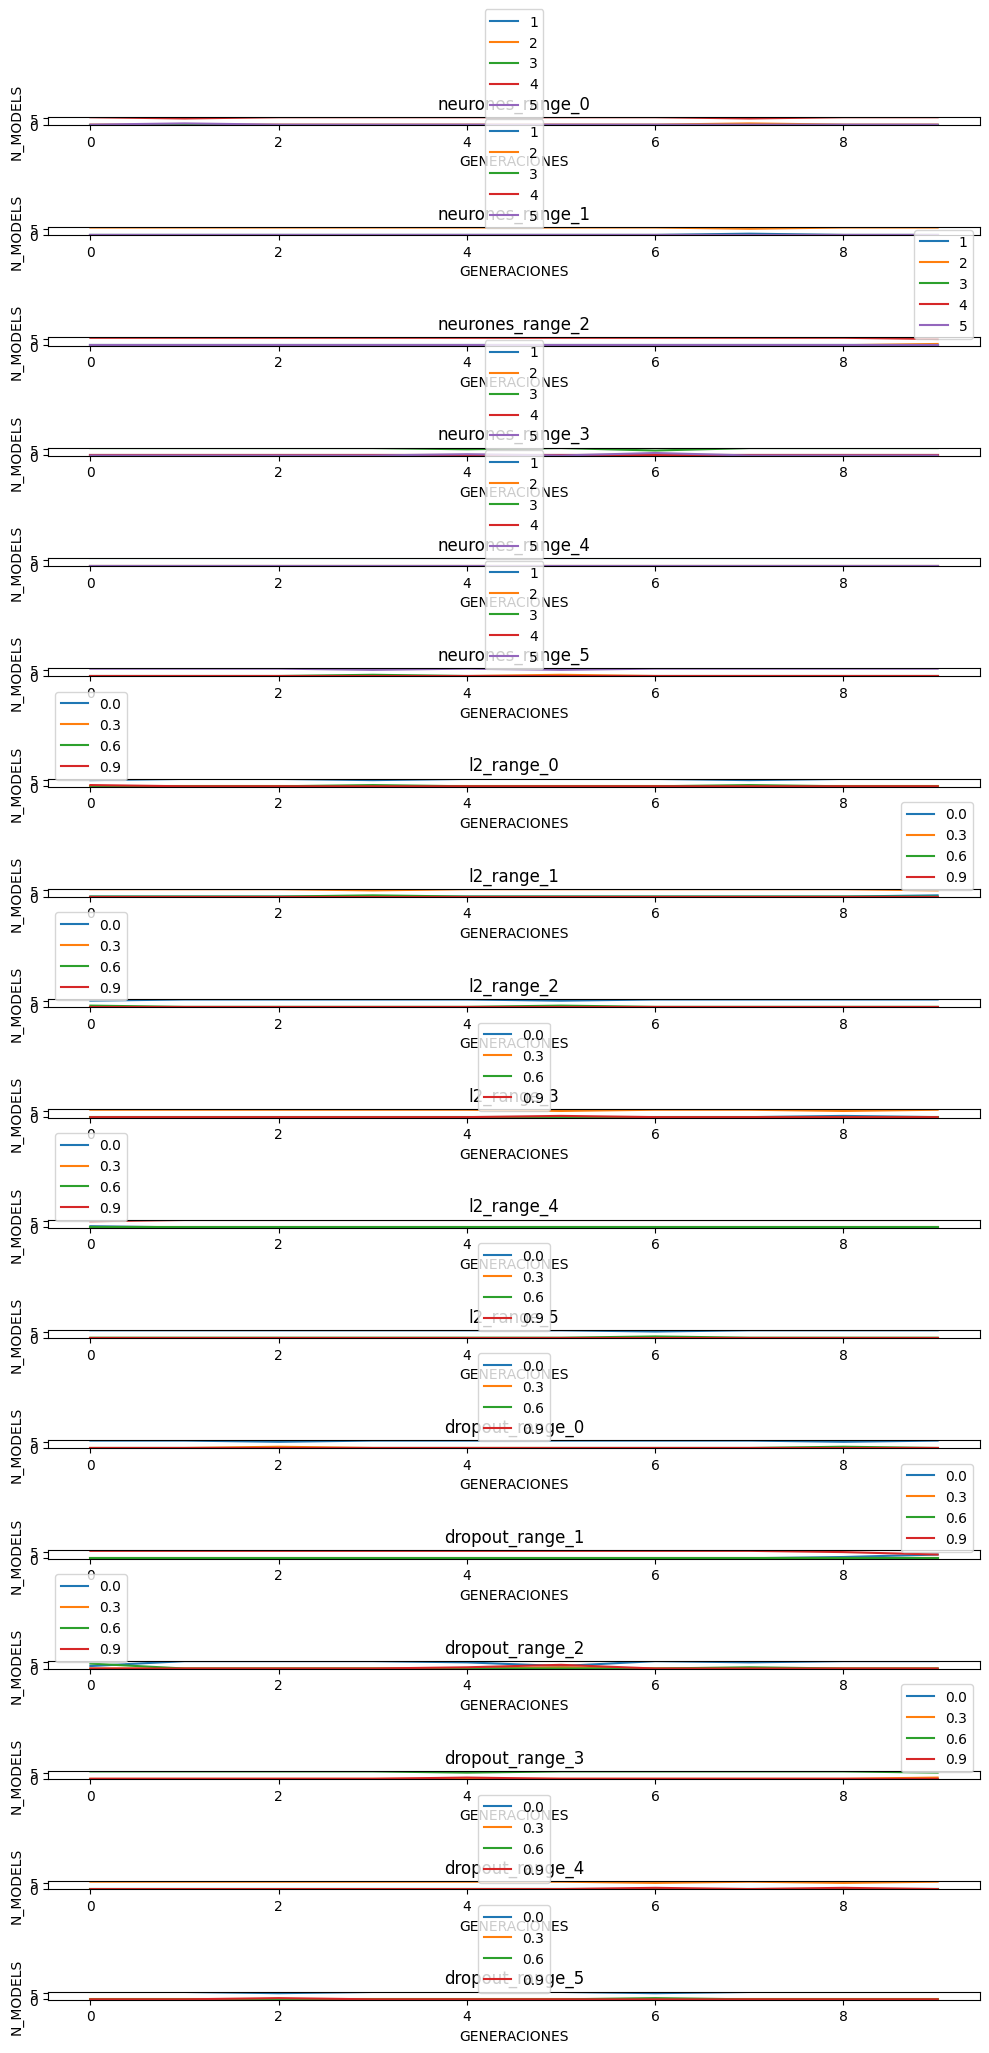

In [ ]:
h_pop.show_historical()

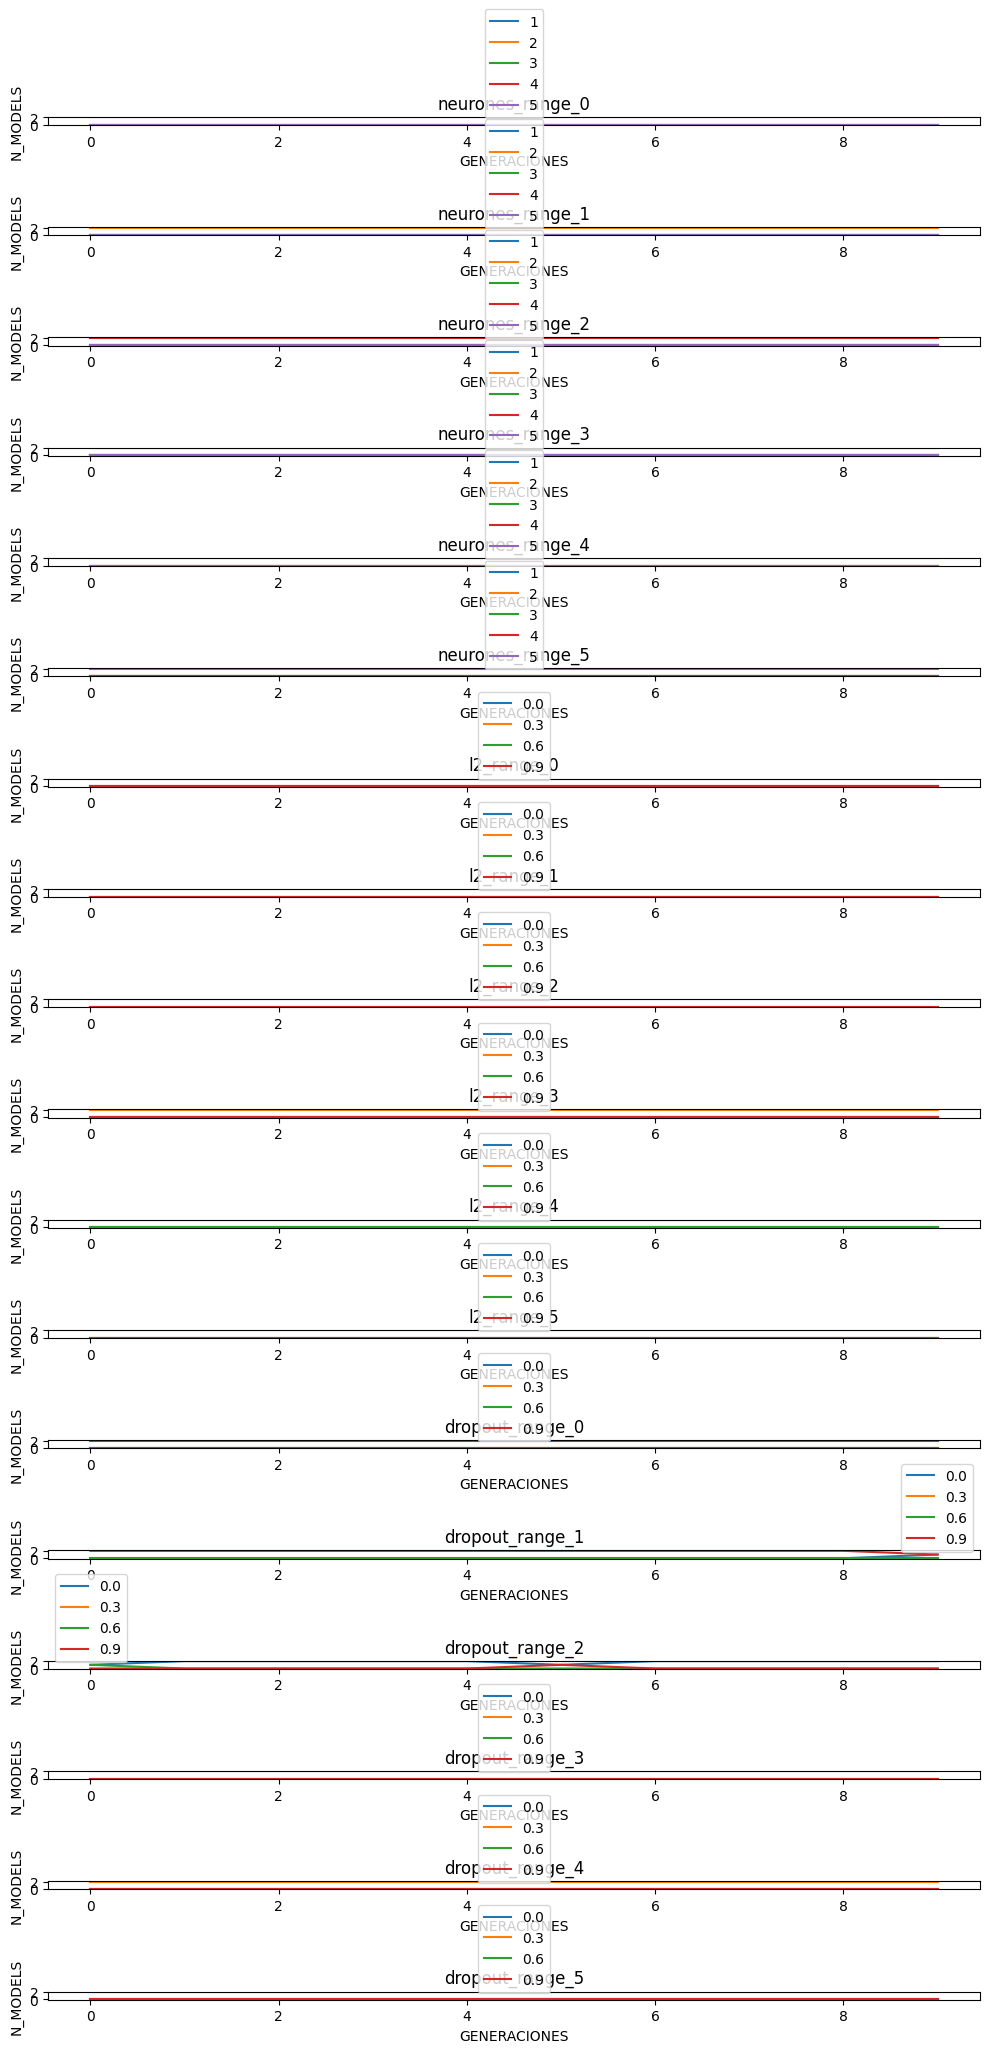

In [ ]:
h_parents_pop.show_historical()

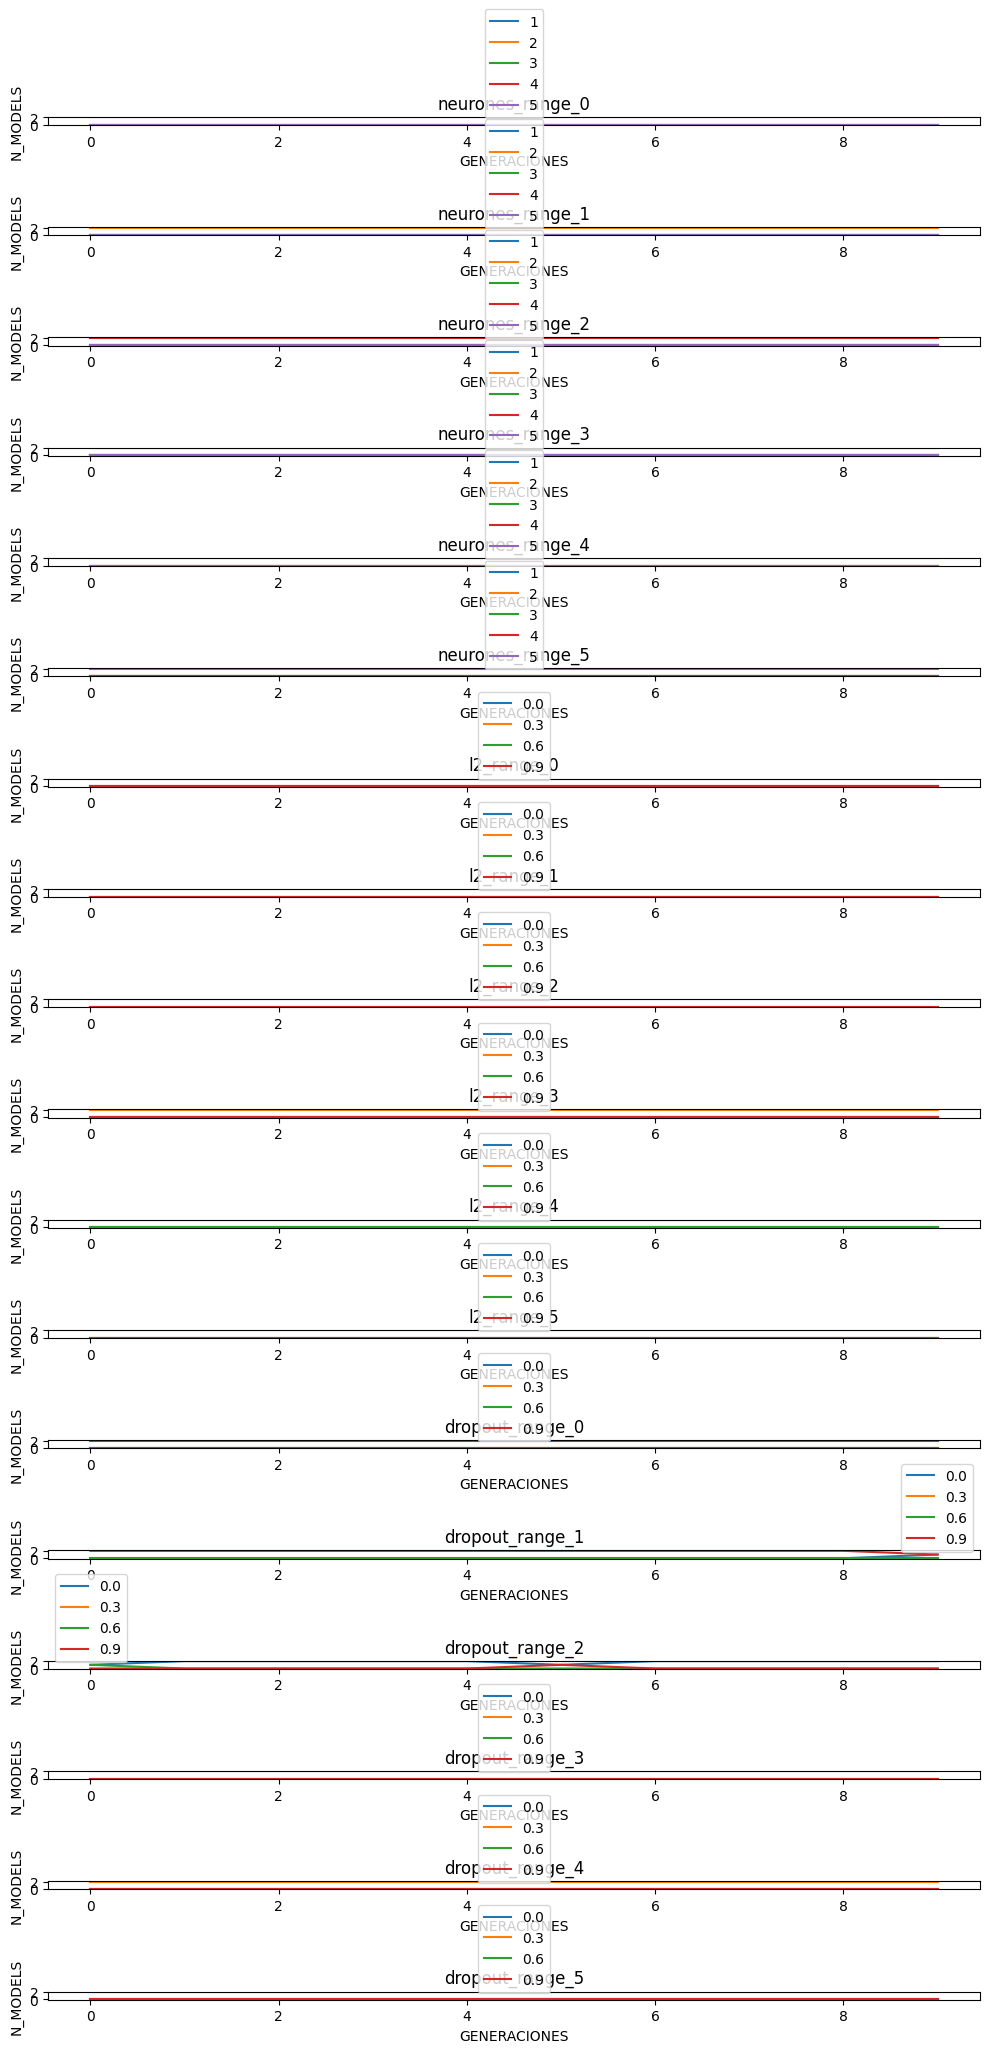

In [ ]:
h_best_pop.show_historical()

# ENTRENAMOS EL MEJOR

In [21]:
import matplotlib.pyplot as plt
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [ ]:
best_global_individual, best_global_fitness

(array([0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. ,
        1. , 0. , 4. , 2. , 4. , 3. , 1. , 5. , 0. , 0.3, 0. , 0.3, 0.9,
        0. , 0. , 0.9, 0. , 0.6, 0.3, 0. ]),
 0.882149875164032)

In [31]:
best_indv = np.array([0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. ,
        1. , 0. , 4. , 2. , 4. , 3. , 1. , 5. , 0. , 0.3, 0. , 0.3, 0.9,
        0. , 0. , 0.9, 0. , 0.6, 0.3, 0. ])

## Visualizar modelo

In [32]:
_ = create_model()
model_a = _.create_model(
    best_indv,
    X_train.shape[1:],
    1)
model_a.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 INPUT (InputLayer)             [(None, 12)]         0           []                               
                                                                                                  
 Densa_0 (Dense)                (None, 4)            52          ['INPUT[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 4)            0           ['Densa_0[0][0]']                
                                                                                                  
 Densa_2 (Dense)                (None, 4)            20          ['dropout[0][0]']                
                                                                                              

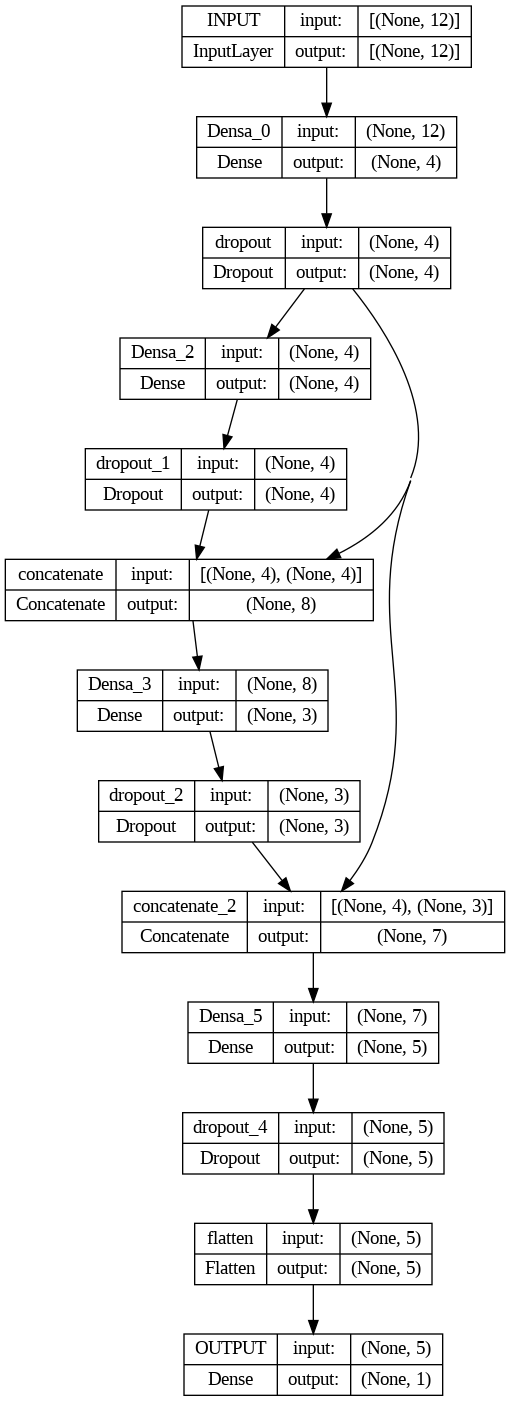

In [33]:
plot_model(model_a, show_shapes=True, show_layer_names=True)

In [33]:
X_train.shape

(186365, 12)

## Entrenar modelo

In [34]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 50, verbose=1, restore_best_weights=True)

history_model_a = model_a.fit(
                              X_train,
                              Y_train,
                              epochs=1000,
                              batch_size= X_train.shape[0],
                              validation_split = 0.3,
                              verbose=1,
                              shuffle = True,
                              callbacks=[early_stopping]
                              )

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 2.2505 - accuracy: 0.5539 - val_loss: 2.1095 - val_accuracy: 0.6075
Epoch 2/1000
1/1 [==============================] - 0s 112ms/step - loss: 2.1561 - accuracy: 0.5790 - val_loss: 2.0318 - val_accuracy: 0.6387
Epoch 3/1000
1/1 [==============================] - 0s 114ms/step - loss: 2.0679 - accuracy: 0.6080 - val_loss: 1.9591 - val_accuracy: 0.6647
Epoch 4/1000
1/1 [==============================] - 0s 118ms/step - loss: 1.9888 - accuracy: 0.6374 - val_loss: 1.8909 - val_accuracy: 0.6906
Epoch 5/1000
1/1 [==============================] - 0s 108ms/step - loss: 1.9132 - accuracy: 0.6680 - val_loss: 1.8266 - val_accuracy: 0.7160
Epoch 6/1000
1/1 [==============================] - 0s 115ms/step - loss: 1.8448 - accuracy: 0.6958 - val_loss: 1.7656 - val_accuracy: 0.7375
Epoch 7/1000
1/1 [==============================] - 0s 117ms/step - loss: 1.7806 - accuracy: 0.7217 - val_loss: 1.7072 - val_accuracy: 0.7563
Epoch 8/1

## Visualizar loss y val_loss

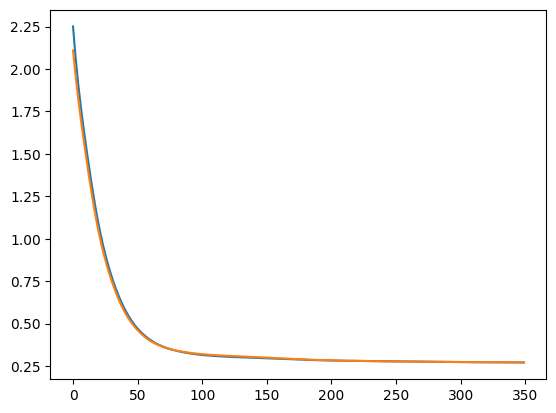

In [35]:
plt.plot(history_model_a.history["loss"])
plt.plot(history_model_a.history["val_loss"])

## Visualizar accuracy y val_accuracy

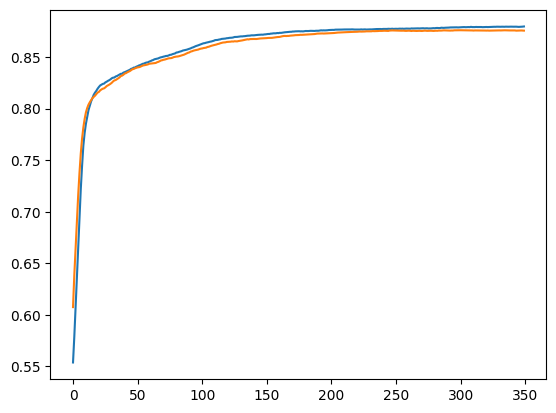

In [36]:
plt.plot(history_model_a.history["accuracy"])
plt.plot(history_model_a.history["val_accuracy"])

# Guardamos el modelo completo en un archivo HDF5

In [37]:
model_a.save('best_model_0.h5')

# Vemos predicciones del mejor

In [42]:
model_a = load_model('best_model_0.h5')

In [43]:
y_pred = model_a(X_test)

In [44]:
y_pred.shape

TensorShape([22998, 1])

## Historico prediccion real

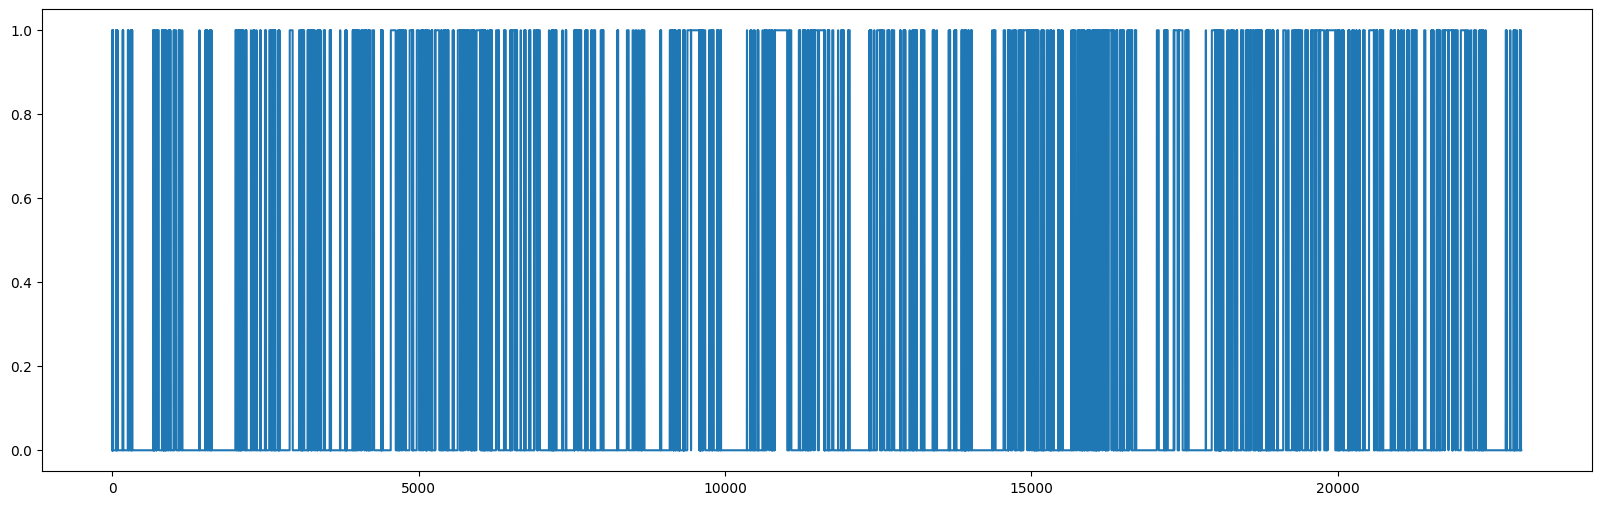

In [45]:
plt.figure(figsize=(20, 6))
#plt.plot(pd.DataFrame(Y_test , columns=data_componentes_IBEX.columns) );
plt.plot(pd.DataFrame(Y_test));

## Historico estimacion

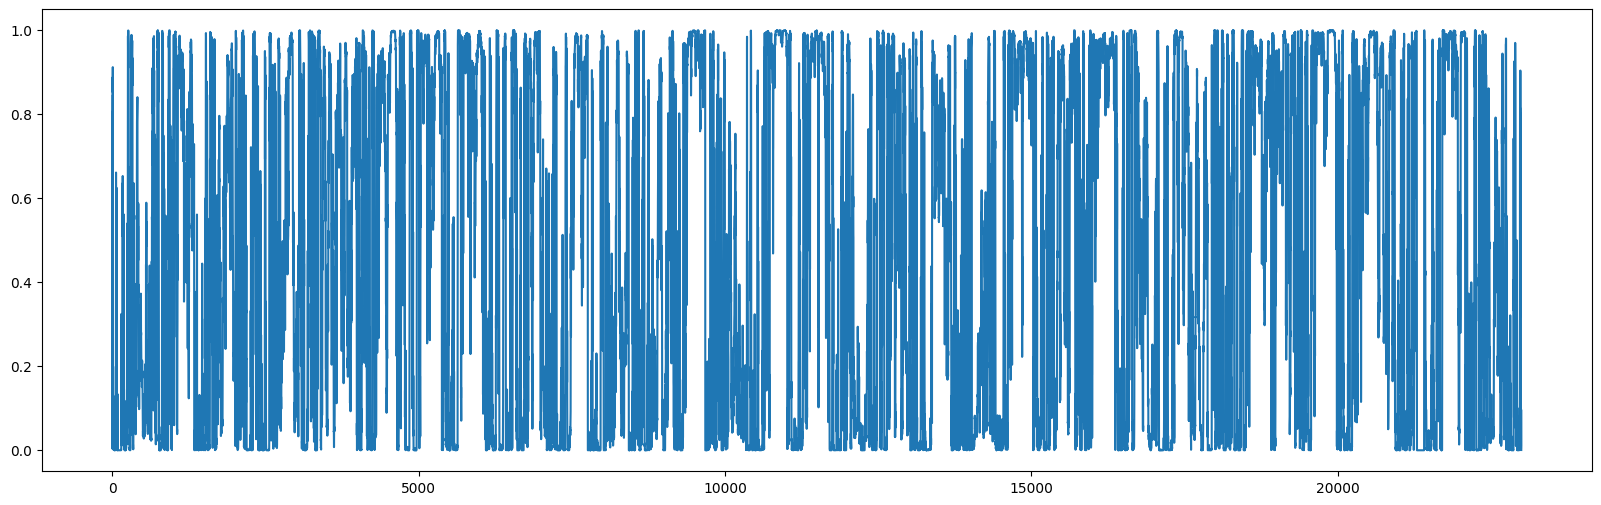

In [46]:
plt.figure(figsize=(20, 6))
#plt.plot((pd.DataFrame(y_pred , columns=data_componentes_IBEX.columns) ));
plt.plot(pd.DataFrame(y_pred ));

# ANALISIS ACCURACY EN TEST  ( BATCHES DE 35 para cada dia )

In [22]:
import tensorflow as tf

In [23]:
df_test.head()

,ticker,date,period_mean_return,period_std_return,period_min_return,period_max_return,sharpe_ratio,sortino_ratio,beta,treynor_ratio,benchmark_distance,informatio_ratio,modigliani_measure,alfa_jensen,label
12507,ACS,2021-01-04,0.001878,0.019079,-0.029343,0.051768,0.054429,0.096996,0.940494,0.001997,0.015735,0.073656,0.001446,0.000909,0
12508,ACS,2021-01-05,0.002509,0.019232,-0.029343,0.051768,0.084160,0.151020,0.949047,0.002643,0.015963,0.126516,0.001824,0.001221,1
12509,ACS,2021-01-06,0.002084,0.018636,-0.029343,0.051768,0.065679,0.114409,0.888067,0.002347,0.014820,0.038311,0.001678,0.001799,0
12510,ACS,2021-01-07,-0.000012,0.016237,-0.029343,0.032875,-0.053704,-0.079857,0.723101,-0.000017,0.013931,-0.070089,0.000217,-0.000786,0
12511,ACS,2021-01-08,-0.000084,0.016221,-0.029343,0.032875,-0.058185,-0.086431,0.722240,-0.000116,0.013926,-0.075156,0.000164,-0.000859,0


Numero de dias:

In [24]:
len(set(df_test.date))

669

## Nº activos por dia:

In [25]:
n_activos = []

for day in set(df_test.date):
  #print(day.date())
  datos_dia = df_test[df_test.date == str(day.date())]
  #print(datos_dia.shape )

  n_activos.append(datos_dia.shape[0])



(array([ 25.,   0.,   0., 103.,   0.,   0., 136.,   0.,   0., 405.]),
 array([32. , 32.3, 32.6, 32.9, 33.2, 33.5, 33.8, 34.1, 34.4, 34.7, 35. ]),
 <BarContainer object of 10 artists>)

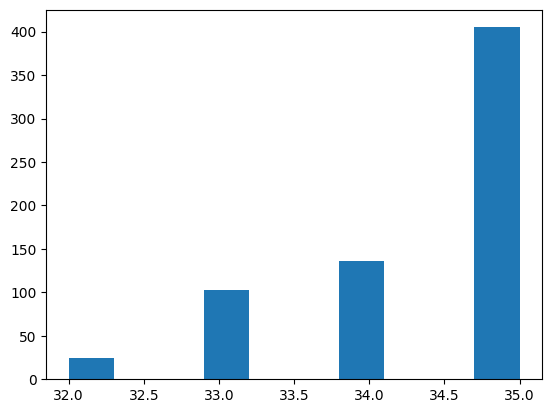

In [26]:
plt.hist(n_activos)

## run_test (def)

In [295]:
def run_test():
  model_fijo = load_model('best_model_0.h5')
  #model_evo = load_model('best_model_0.h5')

  h_acurracy = []
  h_FP = []
  h_FN = []

  for day in set(df_test.date):

    datos_dia = df_test[df_test.date == str(day.date())]

    y_true = np.array( datos_dia.iloc[:,-1] )
    x = datos_dia.iloc[:,2:-1]
    x = scaler.transform(x)

    y_pred = model_fijo(x)
    y_pred = y_pred.numpy().round(2).reshape(-1)

    y_pred_labels = (y_pred >= 0.5).astype(int)

    accuracy = np.mean(y_true == y_pred_labels)
    FP = np.sum((y_pred_labels == 1) & (y_true == 0))
    FN = np.sum((y_pred_labels == 0) & (y_true == 1))

    h_acurracy.append(accuracy)
    h_FP.append(FP)
    h_FN.append(FN)

  return h_acurracy, h_FP, h_FN




In [296]:
h_acurracy, h_FP, h_FN = run_test()

## Ver Acurracy

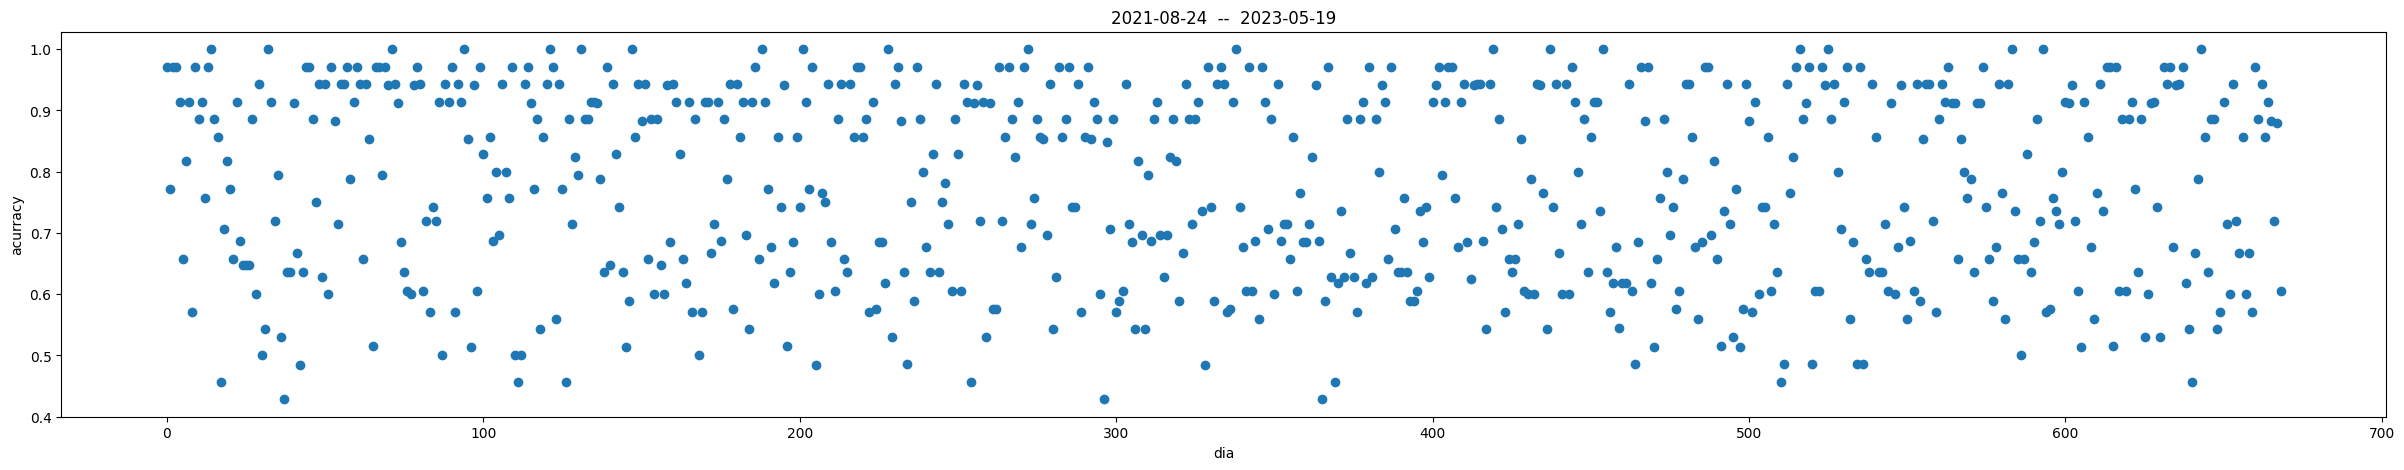

In [297]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot(h_acurracy, marker='o', linestyle='none')

ax.set_title(str(list(set(df_test.date))[0].date()) + " " + " -- " + " " + str(list(set(df_test.date))[-1].date()) )
ax.set_xlabel("dia")
ax.set_ylabel("acurracy")

plt.show()

## Ver Falsos Positivos

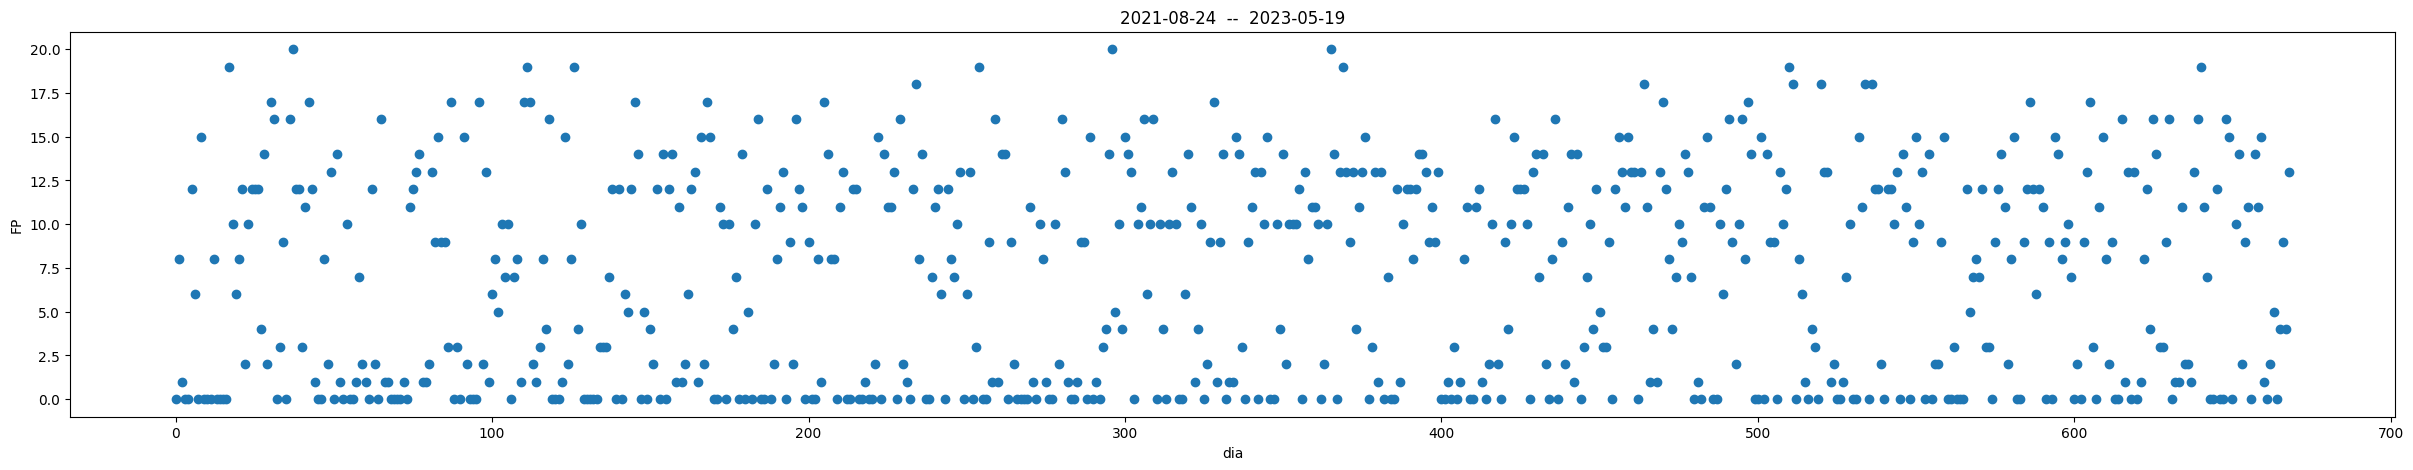

In [298]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot(h_FP, marker='o', linestyle='none')

ax.set_title(str(list(set(df_test.date))[0].date()) + " " + " -- " + " " + str(list(set(df_test.date))[-1].date()) )
ax.set_xlabel("dia")
ax.set_ylabel("FP")

plt.show()

## Ver Falsos negativos

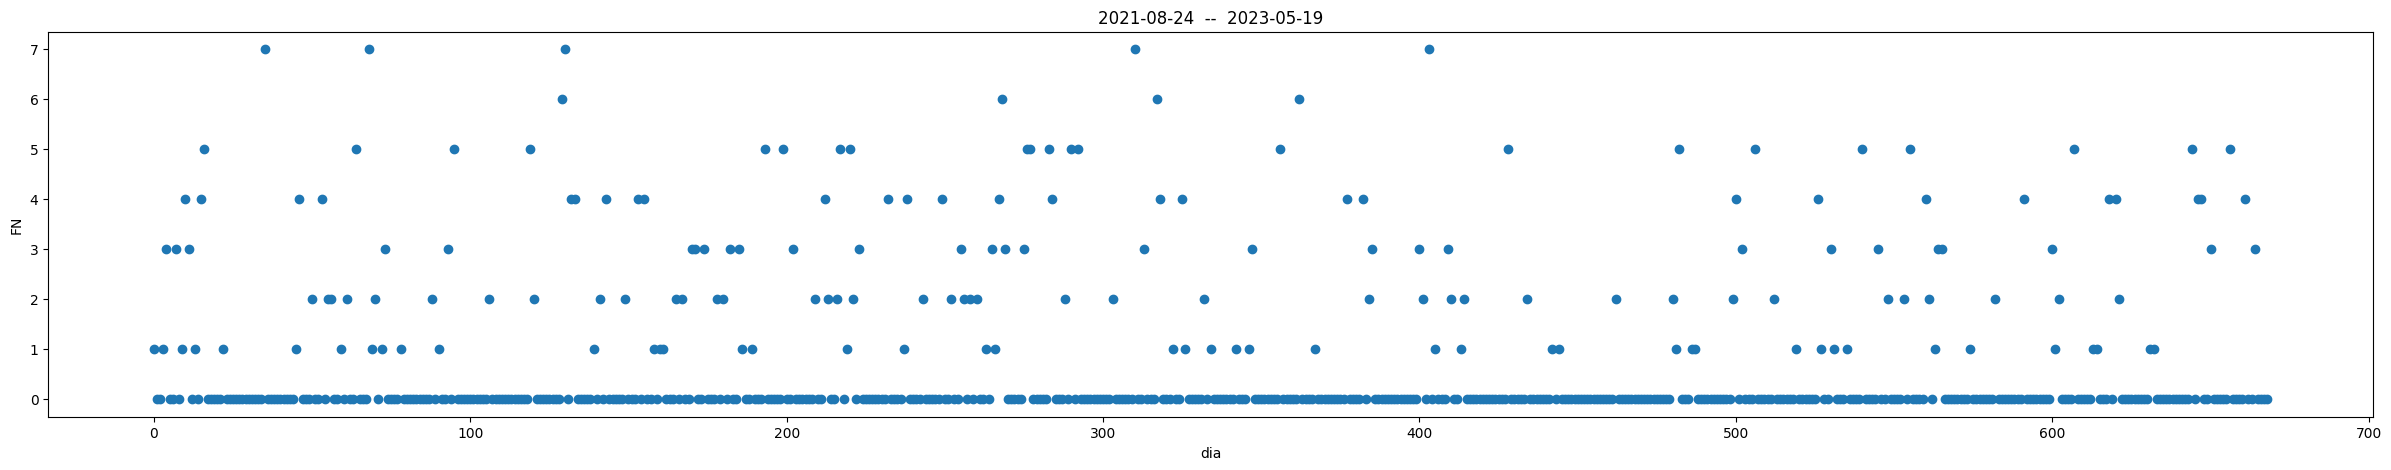

In [299]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot(h_FN, marker='o', linestyle='none')

ax.set_title(str(list(set(df_test.date))[0].date()) + " " + " -- " + " " + str(list(set(df_test.date))[-1].date()) )
ax.set_xlabel("dia")
ax.set_ylabel("FN")

plt.show()

# ANALISIS ACCURACY EN TEST  ( BATCHES DE 35 para cada dia ) CON DATOS MANIPULADOS

## run_test_manipulados (def)





In [409]:
def run_test_manipulados(mascara):

  model_fijo = load_model('best_model_0.h5')
  h_accuracy = []
  h_acurracy_manipulado = []

  for day in set(df_test.date):

    datos_dia = df_test[df_test.date == str(day.date())]

    y_true = np.array( datos_dia.iloc[:,-1] )
    x = datos_dia.iloc[:,2:-1]
    x = scaler.transform(x)
    """
    y_pred = model_fijo(x)
    y_pred = y_pred.numpy().round(2).reshape(-1)

    y_pred_labels = (y_pred >= 0.5).astype(int)

    accuracy = np.mean(y_true == y_pred_labels)
    h_accuracy.append(accuracy)
    """
    # Datos manipulados
    x_manipulados = x * mascara(x.shape[0])

    y_pred = model_fijo(x_manipulados)
    y_pred = y_pred.numpy().round(2).reshape(-1)
    y_pred_labels = (y_pred >= 0.5).astype(int)

    accuracy = np.mean(y_true == y_pred_labels)
    h_acurracy_manipulado.append(accuracy)

  return h_accuracy, h_acurracy_manipulado

## Manipulacion 1

### mascara_1 (def)

In [410]:
def mascara_1(n_activos, array = [0,0,0,0,0,0,1,1,1,1,1,1] ):

  mask = np.array(array)
  # Extender la máscara para que tenga la misma forma que data
  full_mask = np.tile(mask, (n_activos, 1))

  return full_mask

In [411]:
mascara_1(4)

array([[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])

In [412]:
_, h_acurracy_manipulado_1 = run_test_manipulados(mascara_1)

### Ver resultados

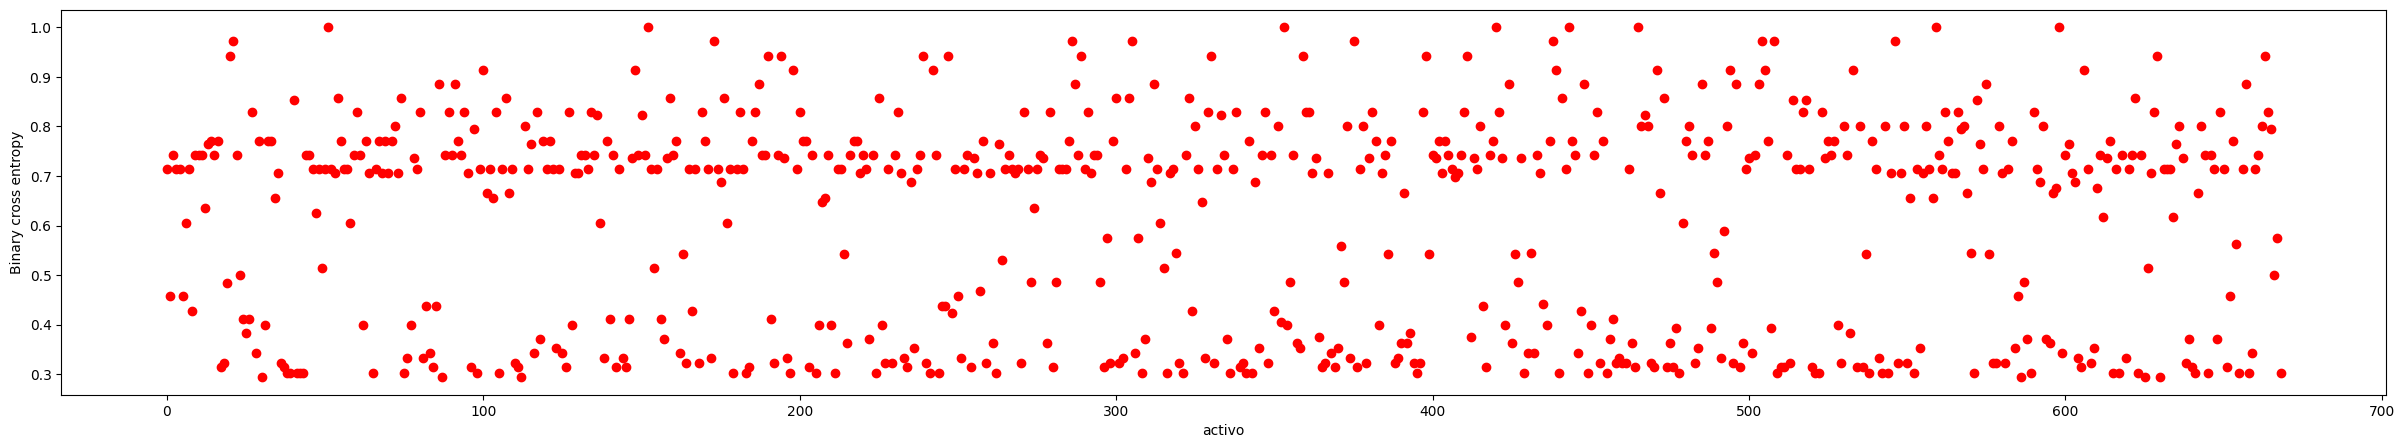

In [413]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot( h_acurracy_manipulado_1,  color='red',  label='Accuracy Manipulado', marker='o', linestyle='none')

ax.set_xlabel("activo")
ax.set_ylabel("Binary cross entropy")

plt.show()

## Manipulacion 2

###Mascara 2

In [414]:
def mascara_2(activos):

    # Crear un array de prueba de forma (35, 12)
  data = np.random.rand(activos, 12)

  # Crear una máscara de longitud 12 con 6 unos y 6 ceros
  mask = np.array([1]*6 + [0]*6)
  np.random.shuffle(mask)

  # Extender la máscara para que tenga la misma forma que data
  full_mask = np.tile(mask, (activos, 1))

  return full_mask

In [444]:
mascara_2(4), mascara_2(4)

(array([[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]]),
 array([[0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]]))

In [416]:
_, h_acurracy_manipulado_2 = run_test_manipulados(mascara_2)

### Ver resultados

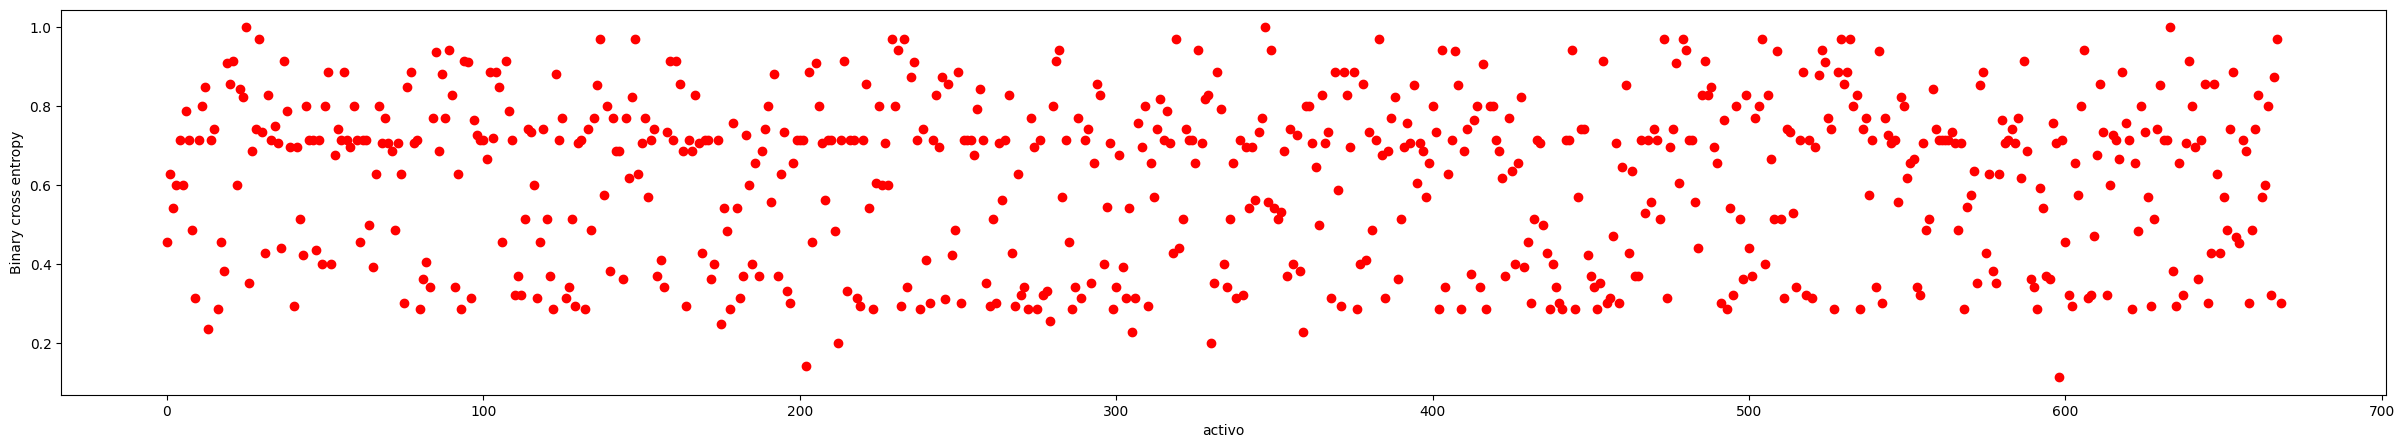

In [417]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot( h_acurracy_manipulado_2,  color='red',  label='Accuracy Manipulado', marker='o', linestyle='none')

ax.set_xlabel("activo")
ax.set_ylabel("Binary cross entropy")

plt.show()

##Manipulacion 3

### Mascara 3

In [418]:
def mascara_3(n_activos):

  # Crear un array de prueba de forma (35, 12)
  data = np.random.rand(n_activos, 12)
  # Crear una máscara de unos con la misma forma que data
  mask = np.ones_like(data)

  # Establecer 6 características aleatoriamente a 0 para cada activo
  for row in mask:
      zero_indices = np.random.choice(12, 6, replace=False)  # seleccionar aleatoriamente 6 características
      row[zero_indices] = 0

  return mask


In [437]:
mascara_3(4), mascara_3(4)

(array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.]]),
 array([[0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
        [0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.]]))

In [420]:
h_accuracy, h_acurracy_manipulado_3 = run_test_manipulados(mascara_3)

### Ver resultados

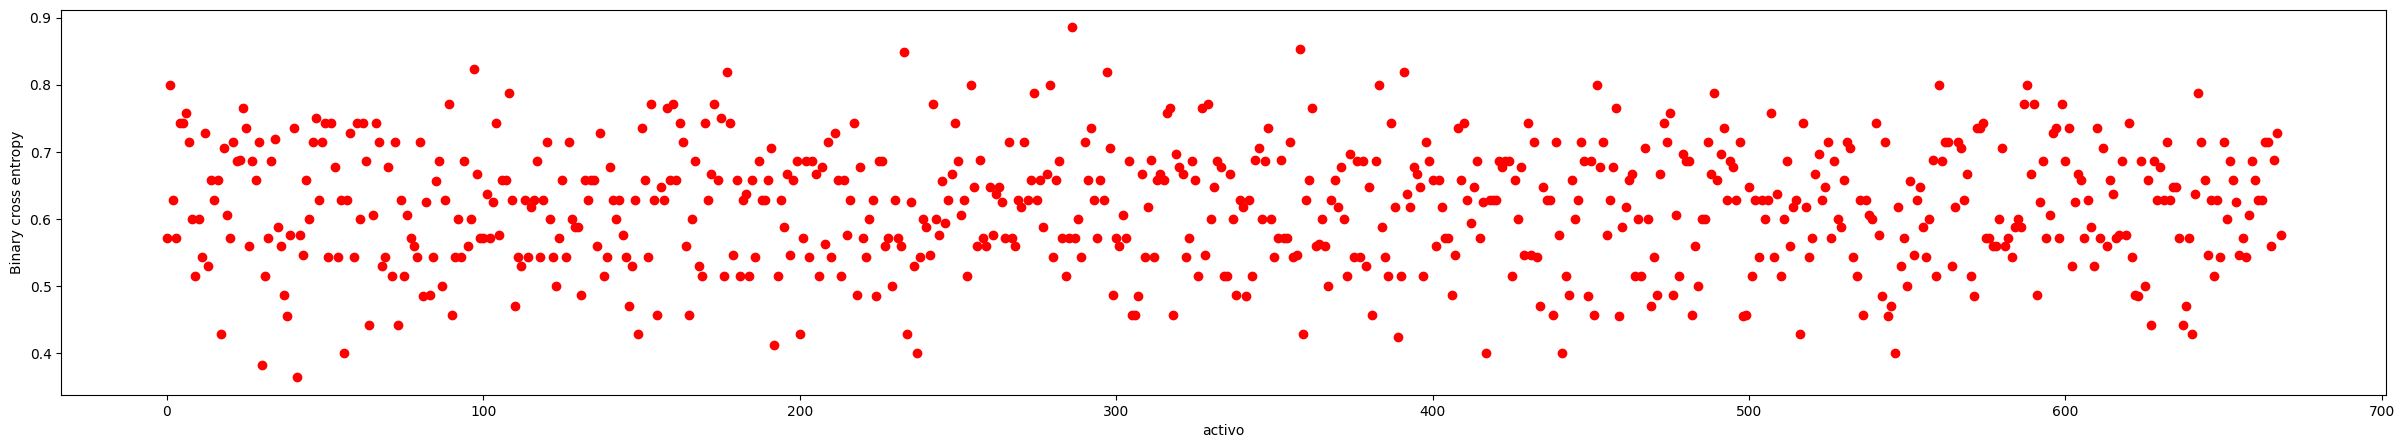

In [421]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot( h_acurracy_manipulado_3,  color='red',  label='Accuracy Manipulado', marker='o', linestyle='none')

ax.set_xlabel("activo")
ax.set_ylabel("Binary cross entropy")

plt.show()

## Manipulacion 4

### Mascara 4

In [422]:
def mascara_4(n_activos, n_features = 11, valor_sustituto = 0):

  # Crear un array de prueba de forma (35, 12)
  data = np.random.rand(n_activos, 12)
  # Crear una máscara de unos con la misma forma que data
  mask = np.ones_like(data)

  # Establecer 6 características aleatoriamente a 0 para cada activo
  for row in mask:
      zero_indices = np.random.choice(12, n_features, replace=False)  # seleccionar aleatoriamente 6 características
      row[zero_indices] = valor_sustituto

  return mask

In [423]:
mascara_4(4), mascara_4(4)

(array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [424]:
h_accuracy, h_acurracy_manipulado_4 = run_test_manipulados(mascara_4)

### Ver resultados

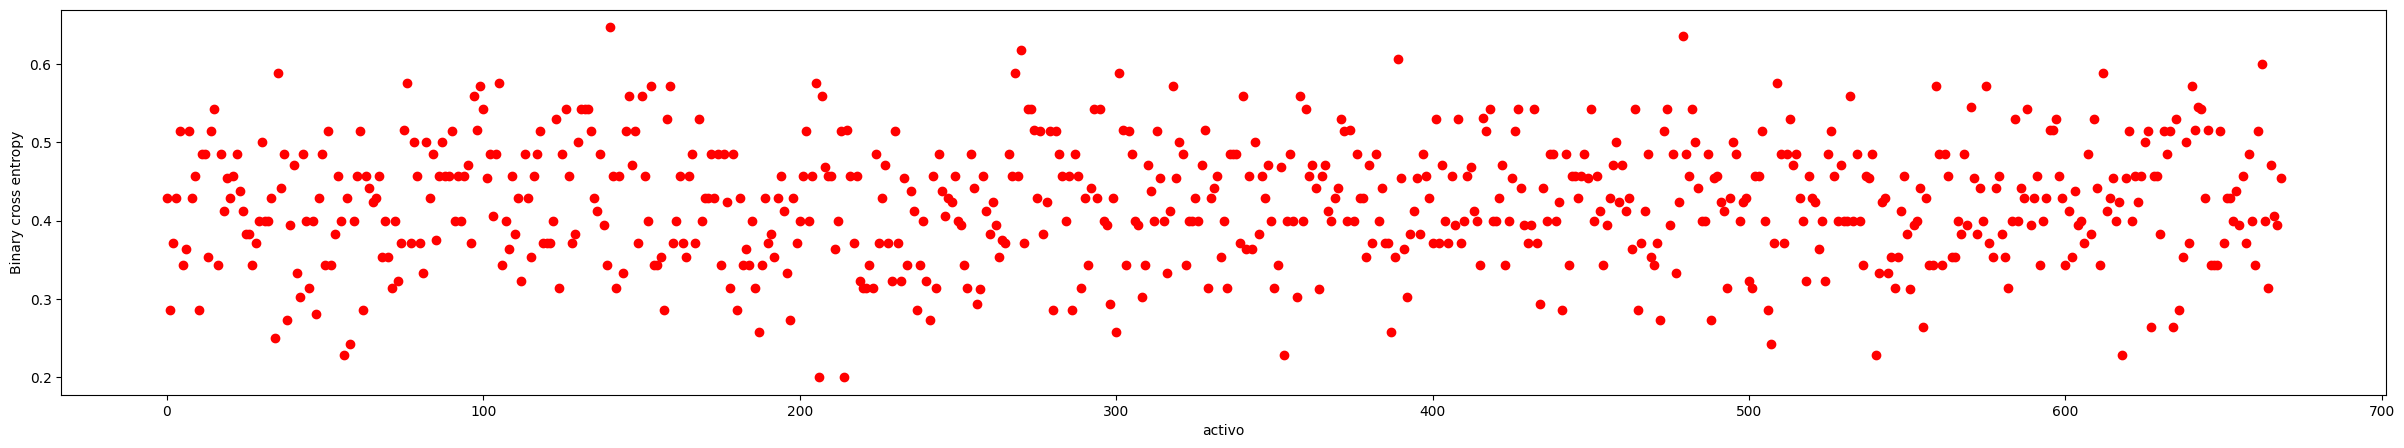

In [425]:
fig, ax = plt.subplots(figsize=(30,5))

plt.plot( h_acurracy_manipulado_4,  color='red',  label='Accuracy Manipulado', marker='o', linestyle='none')

ax.set_xlabel("activo")
ax.set_ylabel("Binary cross entropy")

plt.show()

# Datos de accuracy del modelo y manipulaciones ( mean, max , min )

In [426]:
np.array(h_acurracy).mean(),np.array(h_acurracy_manipulado_1).mean(),  np.array(h_acurracy_manipulado_2).mean(), np.array(h_acurracy_manipulado_3).mean() , np.array(h_acurracy_manipulado_4).mean()

(0.7752306075983866,
 0.6115423605235001,
 0.6201430211981518,
 0.6173815204842638,
 0.4230990687483038)

In [427]:
np.array(h_acurracy).max(),np.array(h_acurracy_manipulado_1).max(),  np.array(h_acurracy_manipulado_2).max(), np.array(h_acurracy_manipulado_3).max(), np.array(h_acurracy_manipulado_4).max()

(1.0, 1.0, 1.0, 0.8857142857142857, 0.6470588235294118)

In [428]:
np.array(h_acurracy).min(),np.array(h_acurracy_manipulado_1).min(),  np.array(h_acurracy_manipulado_2).min(), np.array(h_acurracy_manipulado_3).min(), np.array(h_acurracy_manipulado_4).min()

(0.42857142857142855,
 0.29411764705882354,
 0.11428571428571428,
 0.36363636363636365,
 0.2)

La mascara 4 parece la que mas reduce la performance del modelo, asi que la primera copeticion entre modelo fijo y modelo evoolutivo sera con ella

# ---- > MODELO FIJO VS MODELO EVOLUTIVO ( Mascara 4 ) < ----